In [18]:
import numpy as np
import pandas as pd
from pandas import Series
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
df=pd.read_excel("lyfsense_data.xlsx")

In [17]:
df.head()

,Unnamed: 0,timestamp,dataId,updatedDT,SystemID,UID,DeviceCount,InputPVVoltage,InputPVCurrent,InputPVPower,...,OutputACVoltage,OutputACCurrent,OutputACPower,OutputACEnergyTotal,OutputACEnergyOnGrid,OutputACEnergyOffGrid,Temperature,SystemStatus,TripError,MasterSlave
0,0,1.557362e+09,41611464.0,2019-05-09 00:39:07,103.0,kripya.d180121,2.0,35.693696,NaN,0.0,...,3.7869,NaN,0.0,124.061427,123.809949,0.251477,47.760,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
1,1,1.557362e+09,41611496.0,2019-05-09 00:39:41,103.0,kripya.d180121,2.0,35.886784,NaN,0.0,...,3.7869,NaN,0.0,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER
2,2,1.557362e+09,41611523.0,2019-05-09 00:40:17,103.0,kripya.d180121,2.0,35.886784,NaN,0.0,...,3.7869,NaN,0.0,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER
3,3,1.557362e+09,41611552.0,2019-05-09 00:40:52,103.0,kripya.d180121,2.0,36.300544,NaN,0.0,...,3.7869,NaN,0.0,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
4,4,1.557362e+09,41611581.0,2019-05-09 00:41:26,103.0,kripya.d180121,2.0,36.493632,NaN,0.0,...,3.7869,NaN,0.0,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER


In [5]:
Nan=df.loc[df['InputPVCurrent'] == 'NaN']

/home/harla/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


ValueError: Unrecognized character T in format string

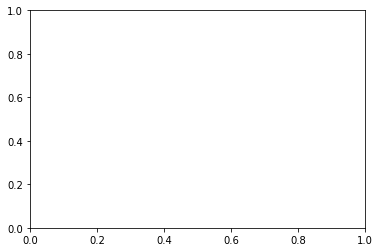

In [13]:
plt.plot('updatedDT','Temperature')

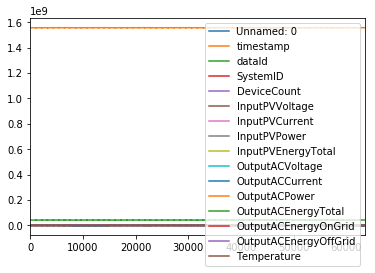

In [15]:
df.plot()

In [16]:
furniture = df.loc[df['updatedDT'] == '2019-05-09']

In [17]:
furniture.isnull().sum()

Unnamed: 0               0
timestamp                0
dataId                   0
updatedDT                0
SystemID                 0
UID                      0
DeviceCount              0
InputPVVoltage           0
InputPVCurrent           0
InputPVPower             0
InputPVEnergyTotal       0
OutputACVoltage          0
OutputACCurrent          0
OutputACPower            0
OutputACEnergyTotal      0
OutputACEnergyOnGrid     0
OutputACEnergyOffGrid    0
Temperature              0
SystemStatus             0
TripError                0
MasterSlave              0
dtype: int64

In [18]:
df.isnull().sum() #No. of entries in each column with NaN

Unnamed: 0                  0
timestamp                  63
dataId                     63
updatedDT                  63
SystemID                   63
UID                        63
DeviceCount                63
InputPVVoltage             63
InputPVCurrent           7909
InputPVPower               63
InputPVEnergyTotal         63
OutputACVoltage            63
OutputACCurrent          7909
OutputACPower              63
OutputACEnergyTotal        63
OutputACEnergyOnGrid       63
OutputACEnergyOffGrid      63
Temperature                63
SystemStatus               63
TripError                  63
MasterSlave                63
dtype: int64

In [19]:
df.tail()

,Unnamed: 0,timestamp,dataId,updatedDT,SystemID,UID,DeviceCount,InputPVVoltage,InputPVCurrent,InputPVPower,...,OutputACVoltage,OutputACCurrent,OutputACPower,OutputACEnergyTotal,OutputACEnergyOnGrid,OutputACEnergyOffGrid,Temperature,SystemStatus,TripError,MasterSlave
63541,63541,1.557923e+09,42092732.0,2019-05-15 12:15:08,120.0,kripya.d180105,4.0,24.508384,NaN,0.0,...,3.7869,NaN,0.0,14.9515,14.950548,0.000952,53.712,SYSTEM_ERROR,PV_PANEL_VOLTAGE,MASTER
63542,63542,1.557923e+09,42092768.0,2019-05-15 12:15:46,120.0,kripya.d180105,4.0,24.729056,NaN,0.0,...,3.7869,NaN,0.0,14.9515,14.950548,0.000952,53.664,SYSTEM_ERROR,PV_PANEL_VOLTAGE,MASTER
63543,63543,1.557923e+09,42092801.0,2019-05-15 12:16:25,120.0,kripya.d180105,4.0,24.370464,NaN,0.0,...,3.7869,NaN,0.0,14.9515,14.950548,0.000952,53.664,SYSTEM_STARTUP,PV_PANEL_VOLTAGE,MASTER
63544,63544,1.557923e+09,42092837.0,2019-05-15 12:17:01,120.0,kripya.d180105,4.0,23.446400,NaN,0.0,...,3.7869,NaN,0.0,14.9515,14.950548,0.000952,53.712,SYSTEM_STARTUP,PV_PANEL_VOLTAGE,MASTER
63545,63545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df.describe()

,Unnamed: 0,timestamp,dataId,SystemID,DeviceCount,InputPVVoltage,InputPVCurrent,InputPVPower,InputPVEnergyTotal,OutputACVoltage,OutputACCurrent,OutputACPower,OutputACEnergyTotal,OutputACEnergyOnGrid,OutputACEnergyOffGrid,Temperature
count,63546.00000,6.348300e+04,6.348300e+04,63483.000000,63483.000000,63483.000000,55637.000000,63483.000000,63483.000000,63483.000000,55637.000000,63483.000000,63483.000000,63483.000000,63483.000000,63483.000000
mean,31772.50000,1.557656e+09,4.186848e+07,110.466156,3.159413,32.294733,3.178843,90.972843,35.980450,224.250535,0.391948,80.026648,42.950105,42.842649,0.107457,59.450532
std,18344.29444,1.659688e+05,1.408688e+05,7.756071,0.779154,5.802268,2.091354,72.995099,29.894397,53.785039,0.296242,69.742691,44.709271,44.637199,0.198094,8.866441
min,0.00000,1.557362e+09,4.161146e+07,103.000000,2.000000,0.000000,0.000000,0.000000,4.368412,3.786900,0.000000,0.000000,3.946491,3.946491,0.000000,0.000000
25%,15886.25000,1.557536e+09,4.176762e+07,105.000000,3.000000,28.659776,1.218420,27.468673,15.245599,224.682900,0.104900,8.789729,14.398209,14.395240,0.000034,56.736000
50%,31772.50000,1.557651e+09,4.186852e+07,105.000000,3.000000,33.790400,3.030900,81.393259,22.567092,234.090900,0.366900,68.328931,20.244626,19.970322,0.001268,60.624000
75%,47658.75000,1.557808e+09,4.199569e+07,120.000000,4.000000,35.845408,5.175000,150.356737,33.830104,249.210900,0.635600,141.975450,30.051884,30.051884,0.230137,63.792000
max,63545.00000,1.557924e+09,4.209412e+07,120.000000,4.000000,41.982848,7.202200,250.320211,102.967976,281.946900,5.984800,515.619846,132.597139,132.345662,1.114426,72.912000


In [21]:
df

,Unnamed: 0,timestamp,dataId,updatedDT,SystemID,UID,DeviceCount,InputPVVoltage,InputPVCurrent,InputPVPower,...,OutputACVoltage,OutputACCurrent,OutputACPower,OutputACEnergyTotal,OutputACEnergyOnGrid,OutputACEnergyOffGrid,Temperature,SystemStatus,TripError,MasterSlave
0,0,1.557362e+09,41611464.0,2019-05-09 00:39:07,103.0,kripya.d180121,2.0,35.693696,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.760,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
1,1,1.557362e+09,41611496.0,2019-05-09 00:39:41,103.0,kripya.d180121,2.0,35.886784,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER
2,2,1.557362e+09,41611523.0,2019-05-09 00:40:17,103.0,kripya.d180121,2.0,35.886784,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER
3,3,1.557362e+09,41611552.0,2019-05-09 00:40:52,103.0,kripya.d180121,2.0,36.300544,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
4,4,1.557362e+09,41611581.0,2019-05-09 00:41:26,103.0,kripya.d180121,2.0,36.493632,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
5,5,1.557363e+09,41611613.0,2019-05-09 00:42:01,103.0,kripya.d180121,2.0,34.052448,0.000000,0.000000,...,238.2189,0.0869,20.701222,124.061628,123.810151,0.251477,46.800,GRID_MODE,FLYBACK_OUTPUT_VOLTAGE,MASTER
6,6,1.557363e+09,41611641.0,2019-05-09 00:42:36,103.0,kripya.d180121,2.0,35.610944,0.000000,0.000000,...,238.0269,0.0281,6.688556,124.061693,123.810216,0.251477,46.944,GRID_MODE,FLYBACK_OUTPUT_VOLTAGE,MASTER
7,7,1.557363e+09,41611672.0,2019-05-09 00:43:11,103.0,kripya.d180121,2.0,35.831616,0.000000,0.000000,...,236.9229,0.0501,11.869837,124.061808,123.810331,0.251477,48.192,GRID_MODE,NO_FAULT,MASTER
8,8,1.557363e+09,41611702.0,2019-05-09 00:43:46,103.0,kripya.d180121,2.0,35.114432,0.000000,0.000000,...,235.1469,0.0697,16.389739,124.061968,123.810490,0.251477,47.712,GRID_MODE,NO_FAULT,MASTER
9,9,1.557363e+09,41611731.0,2019-05-09 00:44:21,103.0,kripya.d180121,2.0,36.121248,0.000000,0.000000,...,235.7709,0.0065,1.532511,124.061983,123.810505,0.251477,48.384,GRID_MODE,NO_FAULT,MASTER


In [34]:
series = Series.from_excel('lyfsense_data.xlsx', header=0)

AttributeError: type object 'Series' has no attribute 'from_excel'

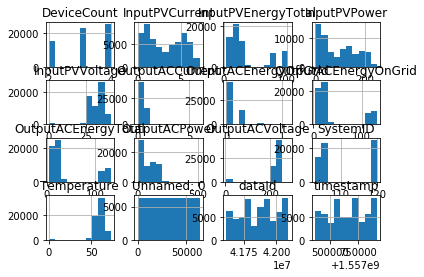

In [37]:
df.hist()
plt.show()

In [38]:
df.notna()

,Unnamed: 0,timestamp,dataId,updatedDT,SystemID,UID,DeviceCount,InputPVVoltage,InputPVCurrent,InputPVPower,...,OutputACVoltage,OutputACCurrent,OutputACPower,OutputACEnergyTotal,OutputACEnergyOnGrid,OutputACEnergyOffGrid,Temperature,SystemStatus,TripError,MasterSlave
0,True,True,True,True,True,True,True,True,False,True,...,True,False,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,False,True,...,True,False,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,False,True,...,True,False,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,False,True,...,True,False,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,False,True,...,True,False,True,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
6,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
7,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
8,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
9,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [39]:
df.isna()

,Unnamed: 0,timestamp,dataId,updatedDT,SystemID,UID,DeviceCount,InputPVVoltage,InputPVCurrent,InputPVPower,...,OutputACVoltage,OutputACCurrent,OutputACPower,OutputACEnergyTotal,OutputACEnergyOnGrid,OutputACEnergyOffGrid,Temperature,SystemStatus,TripError,MasterSlave
0,False,False,False,False,False,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [40]:
df.fillna(0)

,Unnamed: 0,timestamp,dataId,updatedDT,SystemID,UID,DeviceCount,InputPVVoltage,InputPVCurrent,InputPVPower,...,OutputACVoltage,OutputACCurrent,OutputACPower,OutputACEnergyTotal,OutputACEnergyOnGrid,OutputACEnergyOffGrid,Temperature,SystemStatus,TripError,MasterSlave
0,0,1.557362e+09,41611464.0,2019-05-09 00:39:07,103.0,kripya.d180121,2.0,35.693696,0.000000,0.000000,...,3.7869,0.0000,0.000000,124.061427,123.809949,0.251477,47.760,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
1,1,1.557362e+09,41611496.0,2019-05-09 00:39:41,103.0,kripya.d180121,2.0,35.886784,0.000000,0.000000,...,3.7869,0.0000,0.000000,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER
2,2,1.557362e+09,41611523.0,2019-05-09 00:40:17,103.0,kripya.d180121,2.0,35.886784,0.000000,0.000000,...,3.7869,0.0000,0.000000,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER
3,3,1.557362e+09,41611552.0,2019-05-09 00:40:52,103.0,kripya.d180121,2.0,36.300544,0.000000,0.000000,...,3.7869,0.0000,0.000000,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
4,4,1.557362e+09,41611581.0,2019-05-09 00:41:26,103.0,kripya.d180121,2.0,36.493632,0.000000,0.000000,...,3.7869,0.0000,0.000000,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
5,5,1.557363e+09,41611613.0,2019-05-09 00:42:01,103.0,kripya.d180121,2.0,34.052448,0.000000,0.000000,...,238.2189,0.0869,20.701222,124.061628,123.810151,0.251477,46.800,GRID_MODE,FLYBACK_OUTPUT_VOLTAGE,MASTER
6,6,1.557363e+09,41611641.0,2019-05-09 00:42:36,103.0,kripya.d180121,2.0,35.610944,0.000000,0.000000,...,238.0269,0.0281,6.688556,124.061693,123.810216,0.251477,46.944,GRID_MODE,FLYBACK_OUTPUT_VOLTAGE,MASTER
7,7,1.557363e+09,41611672.0,2019-05-09 00:43:11,103.0,kripya.d180121,2.0,35.831616,0.000000,0.000000,...,236.9229,0.0501,11.869837,124.061808,123.810331,0.251477,48.192,GRID_MODE,NO_FAULT,MASTER
8,8,1.557363e+09,41611702.0,2019-05-09 00:43:46,103.0,kripya.d180121,2.0,35.114432,0.000000,0.000000,...,235.1469,0.0697,16.389739,124.061968,123.810490,0.251477,47.712,GRID_MODE,NO_FAULT,MASTER
9,9,1.557363e+09,41611731.0,2019-05-09 00:44:21,103.0,kripya.d180121,2.0,36.121248,0.000000,0.000000,...,235.7709,0.0065,1.532511,124.061983,123.810505,0.251477,48.384,GRID_MODE,NO_FAULT,MASTER


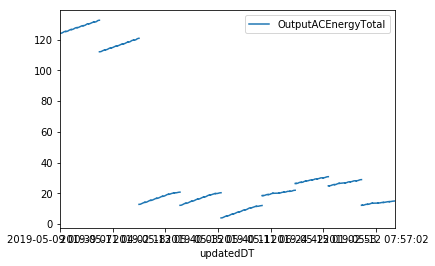

In [41]:
df.plot('updatedDT','OutputACEnergyTotal')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa3b2401438>,
      dtype=object)

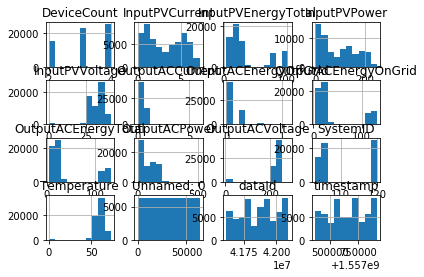

In [42]:
df.hist()

In [43]:
df.isnull().sum()

Unnamed: 0                  0
timestamp                  63
dataId                     63
updatedDT                  63
SystemID                   63
UID                        63
DeviceCount                63
InputPVVoltage             63
InputPVCurrent           7909
InputPVPower               63
InputPVEnergyTotal         63
OutputACVoltage            63
OutputACCurrent          7909
OutputACPower              63
OutputACEnergyTotal        63
OutputACEnergyOnGrid       63
OutputACEnergyOffGrid      63
Temperature                63
SystemStatus               63
TripError                  63
MasterSlave                63
dtype: int64

In [44]:
df.isnull().sum()

Unnamed: 0                  0
timestamp                  63
dataId                     63
updatedDT                  63
SystemID                   63
UID                        63
DeviceCount                63
InputPVVoltage             63
InputPVCurrent           7909
InputPVPower               63
InputPVEnergyTotal         63
OutputACVoltage            63
OutputACCurrent          7909
OutputACPower              63
OutputACEnergyTotal        63
OutputACEnergyOnGrid       63
OutputACEnergyOffGrid      63
Temperature                63
SystemStatus               63
TripError                  63
MasterSlave                63
dtype: int64

In [45]:
df

,Unnamed: 0,timestamp,dataId,updatedDT,SystemID,UID,DeviceCount,InputPVVoltage,InputPVCurrent,InputPVPower,...,OutputACVoltage,OutputACCurrent,OutputACPower,OutputACEnergyTotal,OutputACEnergyOnGrid,OutputACEnergyOffGrid,Temperature,SystemStatus,TripError,MasterSlave
0,0,1.557362e+09,41611464.0,2019-05-09 00:39:07,103.0,kripya.d180121,2.0,35.693696,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.760,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
1,1,1.557362e+09,41611496.0,2019-05-09 00:39:41,103.0,kripya.d180121,2.0,35.886784,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER
2,2,1.557362e+09,41611523.0,2019-05-09 00:40:17,103.0,kripya.d180121,2.0,35.886784,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER
3,3,1.557362e+09,41611552.0,2019-05-09 00:40:52,103.0,kripya.d180121,2.0,36.300544,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
4,4,1.557362e+09,41611581.0,2019-05-09 00:41:26,103.0,kripya.d180121,2.0,36.493632,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
5,5,1.557363e+09,41611613.0,2019-05-09 00:42:01,103.0,kripya.d180121,2.0,34.052448,0.000000,0.000000,...,238.2189,0.0869,20.701222,124.061628,123.810151,0.251477,46.800,GRID_MODE,FLYBACK_OUTPUT_VOLTAGE,MASTER
6,6,1.557363e+09,41611641.0,2019-05-09 00:42:36,103.0,kripya.d180121,2.0,35.610944,0.000000,0.000000,...,238.0269,0.0281,6.688556,124.061693,123.810216,0.251477,46.944,GRID_MODE,FLYBACK_OUTPUT_VOLTAGE,MASTER
7,7,1.557363e+09,41611672.0,2019-05-09 00:43:11,103.0,kripya.d180121,2.0,35.831616,0.000000,0.000000,...,236.9229,0.0501,11.869837,124.061808,123.810331,0.251477,48.192,GRID_MODE,NO_FAULT,MASTER
8,8,1.557363e+09,41611702.0,2019-05-09 00:43:46,103.0,kripya.d180121,2.0,35.114432,0.000000,0.000000,...,235.1469,0.0697,16.389739,124.061968,123.810490,0.251477,47.712,GRID_MODE,NO_FAULT,MASTER
9,9,1.557363e+09,41611731.0,2019-05-09 00:44:21,103.0,kripya.d180121,2.0,36.121248,0.000000,0.000000,...,235.7709,0.0065,1.532511,124.061983,123.810505,0.251477,48.384,GRID_MODE,NO_FAULT,MASTER


In [51]:
df.drop(df.index[1])

,Unnamed: 0,timestamp,dataId,updatedDT,SystemID,UID,DeviceCount,InputPVVoltage,InputPVCurrent,InputPVPower,...,OutputACVoltage,OutputACCurrent,OutputACPower,OutputACEnergyTotal,OutputACEnergyOnGrid,OutputACEnergyOffGrid,Temperature,SystemStatus,TripError,MasterSlave
0,0,1.557362e+09,41611464.0,2019-05-09 00:39:07,103.0,kripya.d180121,2.0,35.693696,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.760,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
2,2,1.557362e+09,41611523.0,2019-05-09 00:40:17,103.0,kripya.d180121,2.0,35.886784,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER
3,3,1.557362e+09,41611552.0,2019-05-09 00:40:52,103.0,kripya.d180121,2.0,36.300544,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
4,4,1.557362e+09,41611581.0,2019-05-09 00:41:26,103.0,kripya.d180121,2.0,36.493632,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
5,5,1.557363e+09,41611613.0,2019-05-09 00:42:01,103.0,kripya.d180121,2.0,34.052448,0.000000,0.000000,...,238.2189,0.0869,20.701222,124.061628,123.810151,0.251477,46.800,GRID_MODE,FLYBACK_OUTPUT_VOLTAGE,MASTER
6,6,1.557363e+09,41611641.0,2019-05-09 00:42:36,103.0,kripya.d180121,2.0,35.610944,0.000000,0.000000,...,238.0269,0.0281,6.688556,124.061693,123.810216,0.251477,46.944,GRID_MODE,FLYBACK_OUTPUT_VOLTAGE,MASTER
7,7,1.557363e+09,41611672.0,2019-05-09 00:43:11,103.0,kripya.d180121,2.0,35.831616,0.000000,0.000000,...,236.9229,0.0501,11.869837,124.061808,123.810331,0.251477,48.192,GRID_MODE,NO_FAULT,MASTER
8,8,1.557363e+09,41611702.0,2019-05-09 00:43:46,103.0,kripya.d180121,2.0,35.114432,0.000000,0.000000,...,235.1469,0.0697,16.389739,124.061968,123.810490,0.251477,47.712,GRID_MODE,NO_FAULT,MASTER
9,9,1.557363e+09,41611731.0,2019-05-09 00:44:21,103.0,kripya.d180121,2.0,36.121248,0.000000,0.000000,...,235.7709,0.0065,1.532511,124.061983,123.810505,0.251477,48.384,GRID_MODE,NO_FAULT,MASTER
10,10,1.557363e+09,41611764.0,2019-05-09 00:44:57,103.0,kripya.d180121,2.0,33.390432,0.000000,0.000000,...,237.3069,0.0249,5.908942,124.062042,123.810564,0.251477,48.720,GRID_MODE,NO_FAULT,MASTER


In [50]:
df.drop(df.index[0])

,Unnamed: 0,timestamp,dataId,updatedDT,SystemID,UID,DeviceCount,InputPVVoltage,InputPVCurrent,InputPVPower,...,OutputACVoltage,OutputACCurrent,OutputACPower,OutputACEnergyTotal,OutputACEnergyOnGrid,OutputACEnergyOffGrid,Temperature,SystemStatus,TripError,MasterSlave
1,1,1.557362e+09,41611496.0,2019-05-09 00:39:41,103.0,kripya.d180121,2.0,35.886784,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER
2,2,1.557362e+09,41611523.0,2019-05-09 00:40:17,103.0,kripya.d180121,2.0,35.886784,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER
3,3,1.557362e+09,41611552.0,2019-05-09 00:40:52,103.0,kripya.d180121,2.0,36.300544,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
4,4,1.557362e+09,41611581.0,2019-05-09 00:41:26,103.0,kripya.d180121,2.0,36.493632,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
5,5,1.557363e+09,41611613.0,2019-05-09 00:42:01,103.0,kripya.d180121,2.0,34.052448,0.000000,0.000000,...,238.2189,0.0869,20.701222,124.061628,123.810151,0.251477,46.800,GRID_MODE,FLYBACK_OUTPUT_VOLTAGE,MASTER
6,6,1.557363e+09,41611641.0,2019-05-09 00:42:36,103.0,kripya.d180121,2.0,35.610944,0.000000,0.000000,...,238.0269,0.0281,6.688556,124.061693,123.810216,0.251477,46.944,GRID_MODE,FLYBACK_OUTPUT_VOLTAGE,MASTER
7,7,1.557363e+09,41611672.0,2019-05-09 00:43:11,103.0,kripya.d180121,2.0,35.831616,0.000000,0.000000,...,236.9229,0.0501,11.869837,124.061808,123.810331,0.251477,48.192,GRID_MODE,NO_FAULT,MASTER
8,8,1.557363e+09,41611702.0,2019-05-09 00:43:46,103.0,kripya.d180121,2.0,35.114432,0.000000,0.000000,...,235.1469,0.0697,16.389739,124.061968,123.810490,0.251477,47.712,GRID_MODE,NO_FAULT,MASTER
9,9,1.557363e+09,41611731.0,2019-05-09 00:44:21,103.0,kripya.d180121,2.0,36.121248,0.000000,0.000000,...,235.7709,0.0065,1.532511,124.061983,123.810505,0.251477,48.384,GRID_MODE,NO_FAULT,MASTER
10,10,1.557363e+09,41611764.0,2019-05-09 00:44:57,103.0,kripya.d180121,2.0,33.390432,0.000000,0.000000,...,237.3069,0.0249,5.908942,124.062042,123.810564,0.251477,48.720,GRID_MODE,NO_FAULT,MASTER


In [52]:
df

,Unnamed: 0,timestamp,dataId,updatedDT,SystemID,UID,DeviceCount,InputPVVoltage,InputPVCurrent,InputPVPower,...,OutputACVoltage,OutputACCurrent,OutputACPower,OutputACEnergyTotal,OutputACEnergyOnGrid,OutputACEnergyOffGrid,Temperature,SystemStatus,TripError,MasterSlave
0,0,1.557362e+09,41611464.0,2019-05-09 00:39:07,103.0,kripya.d180121,2.0,35.693696,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.760,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
1,1,1.557362e+09,41611496.0,2019-05-09 00:39:41,103.0,kripya.d180121,2.0,35.886784,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER
2,2,1.557362e+09,41611523.0,2019-05-09 00:40:17,103.0,kripya.d180121,2.0,35.886784,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER
3,3,1.557362e+09,41611552.0,2019-05-09 00:40:52,103.0,kripya.d180121,2.0,36.300544,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
4,4,1.557362e+09,41611581.0,2019-05-09 00:41:26,103.0,kripya.d180121,2.0,36.493632,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
5,5,1.557363e+09,41611613.0,2019-05-09 00:42:01,103.0,kripya.d180121,2.0,34.052448,0.000000,0.000000,...,238.2189,0.0869,20.701222,124.061628,123.810151,0.251477,46.800,GRID_MODE,FLYBACK_OUTPUT_VOLTAGE,MASTER
6,6,1.557363e+09,41611641.0,2019-05-09 00:42:36,103.0,kripya.d180121,2.0,35.610944,0.000000,0.000000,...,238.0269,0.0281,6.688556,124.061693,123.810216,0.251477,46.944,GRID_MODE,FLYBACK_OUTPUT_VOLTAGE,MASTER
7,7,1.557363e+09,41611672.0,2019-05-09 00:43:11,103.0,kripya.d180121,2.0,35.831616,0.000000,0.000000,...,236.9229,0.0501,11.869837,124.061808,123.810331,0.251477,48.192,GRID_MODE,NO_FAULT,MASTER
8,8,1.557363e+09,41611702.0,2019-05-09 00:43:46,103.0,kripya.d180121,2.0,35.114432,0.000000,0.000000,...,235.1469,0.0697,16.389739,124.061968,123.810490,0.251477,47.712,GRID_MODE,NO_FAULT,MASTER
9,9,1.557363e+09,41611731.0,2019-05-09 00:44:21,103.0,kripya.d180121,2.0,36.121248,0.000000,0.000000,...,235.7709,0.0065,1.532511,124.061983,123.810505,0.251477,48.384,GRID_MODE,NO_FAULT,MASTER


In [53]:
df.drop([0,4])

,Unnamed: 0,timestamp,dataId,updatedDT,SystemID,UID,DeviceCount,InputPVVoltage,InputPVCurrent,InputPVPower,...,OutputACVoltage,OutputACCurrent,OutputACPower,OutputACEnergyTotal,OutputACEnergyOnGrid,OutputACEnergyOffGrid,Temperature,SystemStatus,TripError,MasterSlave
1,1,1.557362e+09,41611496.0,2019-05-09 00:39:41,103.0,kripya.d180121,2.0,35.886784,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER
2,2,1.557362e+09,41611523.0,2019-05-09 00:40:17,103.0,kripya.d180121,2.0,35.886784,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER
3,3,1.557362e+09,41611552.0,2019-05-09 00:40:52,103.0,kripya.d180121,2.0,36.300544,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
5,5,1.557363e+09,41611613.0,2019-05-09 00:42:01,103.0,kripya.d180121,2.0,34.052448,0.000000,0.000000,...,238.2189,0.0869,20.701222,124.061628,123.810151,0.251477,46.800,GRID_MODE,FLYBACK_OUTPUT_VOLTAGE,MASTER
6,6,1.557363e+09,41611641.0,2019-05-09 00:42:36,103.0,kripya.d180121,2.0,35.610944,0.000000,0.000000,...,238.0269,0.0281,6.688556,124.061693,123.810216,0.251477,46.944,GRID_MODE,FLYBACK_OUTPUT_VOLTAGE,MASTER
7,7,1.557363e+09,41611672.0,2019-05-09 00:43:11,103.0,kripya.d180121,2.0,35.831616,0.000000,0.000000,...,236.9229,0.0501,11.869837,124.061808,123.810331,0.251477,48.192,GRID_MODE,NO_FAULT,MASTER
8,8,1.557363e+09,41611702.0,2019-05-09 00:43:46,103.0,kripya.d180121,2.0,35.114432,0.000000,0.000000,...,235.1469,0.0697,16.389739,124.061968,123.810490,0.251477,47.712,GRID_MODE,NO_FAULT,MASTER
9,9,1.557363e+09,41611731.0,2019-05-09 00:44:21,103.0,kripya.d180121,2.0,36.121248,0.000000,0.000000,...,235.7709,0.0065,1.532511,124.061983,123.810505,0.251477,48.384,GRID_MODE,NO_FAULT,MASTER
10,10,1.557363e+09,41611764.0,2019-05-09 00:44:57,103.0,kripya.d180121,2.0,33.390432,0.000000,0.000000,...,237.3069,0.0249,5.908942,124.062042,123.810564,0.251477,48.720,GRID_MODE,NO_FAULT,MASTER
11,11,1.557363e+09,41611793.0,2019-05-09 00:45:32,103.0,kripya.d180121,2.0,33.790400,0.587615,19.855763,...,235.6749,0.0213,5.019875,124.062090,123.810613,0.251477,47.568,GRID_MODE,NO_FAULT,MASTER


In [54]:
df

,Unnamed: 0,timestamp,dataId,updatedDT,SystemID,UID,DeviceCount,InputPVVoltage,InputPVCurrent,InputPVPower,...,OutputACVoltage,OutputACCurrent,OutputACPower,OutputACEnergyTotal,OutputACEnergyOnGrid,OutputACEnergyOffGrid,Temperature,SystemStatus,TripError,MasterSlave
0,0,1.557362e+09,41611464.0,2019-05-09 00:39:07,103.0,kripya.d180121,2.0,35.693696,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.760,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
1,1,1.557362e+09,41611496.0,2019-05-09 00:39:41,103.0,kripya.d180121,2.0,35.886784,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER
2,2,1.557362e+09,41611523.0,2019-05-09 00:40:17,103.0,kripya.d180121,2.0,35.886784,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER
3,3,1.557362e+09,41611552.0,2019-05-09 00:40:52,103.0,kripya.d180121,2.0,36.300544,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
4,4,1.557362e+09,41611581.0,2019-05-09 00:41:26,103.0,kripya.d180121,2.0,36.493632,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
5,5,1.557363e+09,41611613.0,2019-05-09 00:42:01,103.0,kripya.d180121,2.0,34.052448,0.000000,0.000000,...,238.2189,0.0869,20.701222,124.061628,123.810151,0.251477,46.800,GRID_MODE,FLYBACK_OUTPUT_VOLTAGE,MASTER
6,6,1.557363e+09,41611641.0,2019-05-09 00:42:36,103.0,kripya.d180121,2.0,35.610944,0.000000,0.000000,...,238.0269,0.0281,6.688556,124.061693,123.810216,0.251477,46.944,GRID_MODE,FLYBACK_OUTPUT_VOLTAGE,MASTER
7,7,1.557363e+09,41611672.0,2019-05-09 00:43:11,103.0,kripya.d180121,2.0,35.831616,0.000000,0.000000,...,236.9229,0.0501,11.869837,124.061808,123.810331,0.251477,48.192,GRID_MODE,NO_FAULT,MASTER
8,8,1.557363e+09,41611702.0,2019-05-09 00:43:46,103.0,kripya.d180121,2.0,35.114432,0.000000,0.000000,...,235.1469,0.0697,16.389739,124.061968,123.810490,0.251477,47.712,GRID_MODE,NO_FAULT,MASTER
9,9,1.557363e+09,41611731.0,2019-05-09 00:44:21,103.0,kripya.d180121,2.0,36.121248,0.000000,0.000000,...,235.7709,0.0065,1.532511,124.061983,123.810505,0.251477,48.384,GRID_MODE,NO_FAULT,MASTER


In [55]:
df.set_index('updatedDT')

,Unnamed: 0,timestamp,dataId,SystemID,UID,DeviceCount,InputPVVoltage,InputPVCurrent,InputPVPower,InputPVEnergyTotal,OutputACVoltage,OutputACCurrent,OutputACPower,OutputACEnergyTotal,OutputACEnergyOnGrid,OutputACEnergyOffGrid,Temperature,SystemStatus,TripError,MasterSlave
updatedDT,,,,,,,,,,,,,,,,,,,,
2019-05-09 00:39:07,0,1.557362e+09,41611464.0,103.0,kripya.d180121,2.0,35.693696,NaN,0.000000,93.362885,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.760,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 00:39:41,1,1.557362e+09,41611496.0,103.0,kripya.d180121,2.0,35.886784,NaN,0.000000,93.362885,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 00:40:17,2,1.557362e+09,41611523.0,103.0,kripya.d180121,2.0,35.886784,NaN,0.000000,93.362885,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 00:40:52,3,1.557362e+09,41611552.0,103.0,kripya.d180121,2.0,36.300544,NaN,0.000000,93.362885,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 00:41:26,4,1.557362e+09,41611581.0,103.0,kripya.d180121,2.0,36.493632,NaN,0.000000,93.362885,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 00:42:01,5,1.557363e+09,41611613.0,103.0,kripya.d180121,2.0,34.052448,0.000000,0.000000,93.362885,238.2189,0.0869,20.701222,124.061628,123.810151,0.251477,46.800,GRID_MODE,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 00:42:36,6,1.557363e+09,41611641.0,103.0,kripya.d180121,2.0,35.610944,0.000000,0.000000,93.362885,238.0269,0.0281,6.688556,124.061693,123.810216,0.251477,46.944,GRID_MODE,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 00:43:11,7,1.557363e+09,41611672.0,103.0,kripya.d180121,2.0,35.831616,0.000000,0.000000,93.362885,236.9229,0.0501,11.869837,124.061808,123.810331,0.251477,48.192,GRID_MODE,NO_FAULT,MASTER
2019-05-09 00:43:46,8,1.557363e+09,41611702.0,103.0,kripya.d180121,2.0,35.114432,0.000000,0.000000,93.362885,235.1469,0.0697,16.389739,124.061968,123.810490,0.251477,47.712,GRID_MODE,NO_FAULT,MASTER


In [56]:
df.index

RangeIndex(start=0, stop=63546, step=1)

In [57]:
df.drop([0,4])

,Unnamed: 0,timestamp,dataId,updatedDT,SystemID,UID,DeviceCount,InputPVVoltage,InputPVCurrent,InputPVPower,...,OutputACVoltage,OutputACCurrent,OutputACPower,OutputACEnergyTotal,OutputACEnergyOnGrid,OutputACEnergyOffGrid,Temperature,SystemStatus,TripError,MasterSlave
1,1,1.557362e+09,41611496.0,2019-05-09 00:39:41,103.0,kripya.d180121,2.0,35.886784,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER
2,2,1.557362e+09,41611523.0,2019-05-09 00:40:17,103.0,kripya.d180121,2.0,35.886784,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER
3,3,1.557362e+09,41611552.0,2019-05-09 00:40:52,103.0,kripya.d180121,2.0,36.300544,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
5,5,1.557363e+09,41611613.0,2019-05-09 00:42:01,103.0,kripya.d180121,2.0,34.052448,0.000000,0.000000,...,238.2189,0.0869,20.701222,124.061628,123.810151,0.251477,46.800,GRID_MODE,FLYBACK_OUTPUT_VOLTAGE,MASTER
6,6,1.557363e+09,41611641.0,2019-05-09 00:42:36,103.0,kripya.d180121,2.0,35.610944,0.000000,0.000000,...,238.0269,0.0281,6.688556,124.061693,123.810216,0.251477,46.944,GRID_MODE,FLYBACK_OUTPUT_VOLTAGE,MASTER
7,7,1.557363e+09,41611672.0,2019-05-09 00:43:11,103.0,kripya.d180121,2.0,35.831616,0.000000,0.000000,...,236.9229,0.0501,11.869837,124.061808,123.810331,0.251477,48.192,GRID_MODE,NO_FAULT,MASTER
8,8,1.557363e+09,41611702.0,2019-05-09 00:43:46,103.0,kripya.d180121,2.0,35.114432,0.000000,0.000000,...,235.1469,0.0697,16.389739,124.061968,123.810490,0.251477,47.712,GRID_MODE,NO_FAULT,MASTER
9,9,1.557363e+09,41611731.0,2019-05-09 00:44:21,103.0,kripya.d180121,2.0,36.121248,0.000000,0.000000,...,235.7709,0.0065,1.532511,124.061983,123.810505,0.251477,48.384,GRID_MODE,NO_FAULT,MASTER
10,10,1.557363e+09,41611764.0,2019-05-09 00:44:57,103.0,kripya.d180121,2.0,33.390432,0.000000,0.000000,...,237.3069,0.0249,5.908942,124.062042,123.810564,0.251477,48.720,GRID_MODE,NO_FAULT,MASTER
11,11,1.557363e+09,41611793.0,2019-05-09 00:45:32,103.0,kripya.d180121,2.0,33.790400,0.587615,19.855763,...,235.6749,0.0213,5.019875,124.062090,123.810613,0.251477,47.568,GRID_MODE,NO_FAULT,MASTER


In [58]:
df

,Unnamed: 0,timestamp,dataId,updatedDT,SystemID,UID,DeviceCount,InputPVVoltage,InputPVCurrent,InputPVPower,...,OutputACVoltage,OutputACCurrent,OutputACPower,OutputACEnergyTotal,OutputACEnergyOnGrid,OutputACEnergyOffGrid,Temperature,SystemStatus,TripError,MasterSlave
0,0,1.557362e+09,41611464.0,2019-05-09 00:39:07,103.0,kripya.d180121,2.0,35.693696,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.760,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
1,1,1.557362e+09,41611496.0,2019-05-09 00:39:41,103.0,kripya.d180121,2.0,35.886784,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER
2,2,1.557362e+09,41611523.0,2019-05-09 00:40:17,103.0,kripya.d180121,2.0,35.886784,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER
3,3,1.557362e+09,41611552.0,2019-05-09 00:40:52,103.0,kripya.d180121,2.0,36.300544,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
4,4,1.557362e+09,41611581.0,2019-05-09 00:41:26,103.0,kripya.d180121,2.0,36.493632,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
5,5,1.557363e+09,41611613.0,2019-05-09 00:42:01,103.0,kripya.d180121,2.0,34.052448,0.000000,0.000000,...,238.2189,0.0869,20.701222,124.061628,123.810151,0.251477,46.800,GRID_MODE,FLYBACK_OUTPUT_VOLTAGE,MASTER
6,6,1.557363e+09,41611641.0,2019-05-09 00:42:36,103.0,kripya.d180121,2.0,35.610944,0.000000,0.000000,...,238.0269,0.0281,6.688556,124.061693,123.810216,0.251477,46.944,GRID_MODE,FLYBACK_OUTPUT_VOLTAGE,MASTER
7,7,1.557363e+09,41611672.0,2019-05-09 00:43:11,103.0,kripya.d180121,2.0,35.831616,0.000000,0.000000,...,236.9229,0.0501,11.869837,124.061808,123.810331,0.251477,48.192,GRID_MODE,NO_FAULT,MASTER
8,8,1.557363e+09,41611702.0,2019-05-09 00:43:46,103.0,kripya.d180121,2.0,35.114432,0.000000,0.000000,...,235.1469,0.0697,16.389739,124.061968,123.810490,0.251477,47.712,GRID_MODE,NO_FAULT,MASTER
9,9,1.557363e+09,41611731.0,2019-05-09 00:44:21,103.0,kripya.d180121,2.0,36.121248,0.000000,0.000000,...,235.7709,0.0065,1.532511,124.061983,123.810505,0.251477,48.384,GRID_MODE,NO_FAULT,MASTER


In [59]:
df1=df.set_index('updatedDT')

In [60]:
df1

,Unnamed: 0,timestamp,dataId,SystemID,UID,DeviceCount,InputPVVoltage,InputPVCurrent,InputPVPower,InputPVEnergyTotal,OutputACVoltage,OutputACCurrent,OutputACPower,OutputACEnergyTotal,OutputACEnergyOnGrid,OutputACEnergyOffGrid,Temperature,SystemStatus,TripError,MasterSlave
updatedDT,,,,,,,,,,,,,,,,,,,,
2019-05-09 00:39:07,0,1.557362e+09,41611464.0,103.0,kripya.d180121,2.0,35.693696,NaN,0.000000,93.362885,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.760,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 00:39:41,1,1.557362e+09,41611496.0,103.0,kripya.d180121,2.0,35.886784,NaN,0.000000,93.362885,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 00:40:17,2,1.557362e+09,41611523.0,103.0,kripya.d180121,2.0,35.886784,NaN,0.000000,93.362885,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 00:40:52,3,1.557362e+09,41611552.0,103.0,kripya.d180121,2.0,36.300544,NaN,0.000000,93.362885,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 00:41:26,4,1.557362e+09,41611581.0,103.0,kripya.d180121,2.0,36.493632,NaN,0.000000,93.362885,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 00:42:01,5,1.557363e+09,41611613.0,103.0,kripya.d180121,2.0,34.052448,0.000000,0.000000,93.362885,238.2189,0.0869,20.701222,124.061628,123.810151,0.251477,46.800,GRID_MODE,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 00:42:36,6,1.557363e+09,41611641.0,103.0,kripya.d180121,2.0,35.610944,0.000000,0.000000,93.362885,238.0269,0.0281,6.688556,124.061693,123.810216,0.251477,46.944,GRID_MODE,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 00:43:11,7,1.557363e+09,41611672.0,103.0,kripya.d180121,2.0,35.831616,0.000000,0.000000,93.362885,236.9229,0.0501,11.869837,124.061808,123.810331,0.251477,48.192,GRID_MODE,NO_FAULT,MASTER
2019-05-09 00:43:46,8,1.557363e+09,41611702.0,103.0,kripya.d180121,2.0,35.114432,0.000000,0.000000,93.362885,235.1469,0.0697,16.389739,124.061968,123.810490,0.251477,47.712,GRID_MODE,NO_FAULT,MASTER


In [61]:
df1.isnull().sum()

Unnamed: 0                  0
timestamp                  63
dataId                     63
SystemID                   63
UID                        63
DeviceCount                63
InputPVVoltage             63
InputPVCurrent           7909
InputPVPower               63
InputPVEnergyTotal         63
OutputACVoltage            63
OutputACCurrent          7909
OutputACPower              63
OutputACEnergyTotal        63
OutputACEnergyOnGrid       63
OutputACEnergyOffGrid      63
Temperature                63
SystemStatus               63
TripError                  63
MasterSlave                63
dtype: int64

In [65]:
df1

,Unnamed: 0,timestamp,dataId,SystemID,UID,DeviceCount,InputPVVoltage,InputPVCurrent,InputPVPower,InputPVEnergyTotal,OutputACVoltage,OutputACCurrent,OutputACPower,OutputACEnergyTotal,OutputACEnergyOnGrid,OutputACEnergyOffGrid,Temperature,SystemStatus,TripError,MasterSlave
updatedDT,,,,,,,,,,,,,,,,,,,,
2019-05-09 00:39:07,0,1.557362e+09,41611464.0,103.0,kripya.d180121,2.0,35.693696,NaN,0.000000,93.362885,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.760,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 00:39:41,1,1.557362e+09,41611496.0,103.0,kripya.d180121,2.0,35.886784,NaN,0.000000,93.362885,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 00:40:17,2,1.557362e+09,41611523.0,103.0,kripya.d180121,2.0,35.886784,NaN,0.000000,93.362885,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 00:40:52,3,1.557362e+09,41611552.0,103.0,kripya.d180121,2.0,36.300544,NaN,0.000000,93.362885,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 00:41:26,4,1.557362e+09,41611581.0,103.0,kripya.d180121,2.0,36.493632,NaN,0.000000,93.362885,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 00:42:01,5,1.557363e+09,41611613.0,103.0,kripya.d180121,2.0,34.052448,0.000000,0.000000,93.362885,238.2189,0.0869,20.701222,124.061628,123.810151,0.251477,46.800,GRID_MODE,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 00:42:36,6,1.557363e+09,41611641.0,103.0,kripya.d180121,2.0,35.610944,0.000000,0.000000,93.362885,238.0269,0.0281,6.688556,124.061693,123.810216,0.251477,46.944,GRID_MODE,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 00:43:11,7,1.557363e+09,41611672.0,103.0,kripya.d180121,2.0,35.831616,0.000000,0.000000,93.362885,236.9229,0.0501,11.869837,124.061808,123.810331,0.251477,48.192,GRID_MODE,NO_FAULT,MASTER
2019-05-09 00:43:46,8,1.557363e+09,41611702.0,103.0,kripya.d180121,2.0,35.114432,0.000000,0.000000,93.362885,235.1469,0.0697,16.389739,124.061968,123.810490,0.251477,47.712,GRID_MODE,NO_FAULT,MASTER


In [66]:
df2=df

In [67]:
df2

,Unnamed: 0,timestamp,dataId,updatedDT,SystemID,UID,DeviceCount,InputPVVoltage,InputPVCurrent,InputPVPower,...,OutputACVoltage,OutputACCurrent,OutputACPower,OutputACEnergyTotal,OutputACEnergyOnGrid,OutputACEnergyOffGrid,Temperature,SystemStatus,TripError,MasterSlave
0,0,1.557362e+09,41611464.0,2019-05-09 00:39:07,103.0,kripya.d180121,2.0,35.693696,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.760,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
1,1,1.557362e+09,41611496.0,2019-05-09 00:39:41,103.0,kripya.d180121,2.0,35.886784,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER
2,2,1.557362e+09,41611523.0,2019-05-09 00:40:17,103.0,kripya.d180121,2.0,35.886784,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER
3,3,1.557362e+09,41611552.0,2019-05-09 00:40:52,103.0,kripya.d180121,2.0,36.300544,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
4,4,1.557362e+09,41611581.0,2019-05-09 00:41:26,103.0,kripya.d180121,2.0,36.493632,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
5,5,1.557363e+09,41611613.0,2019-05-09 00:42:01,103.0,kripya.d180121,2.0,34.052448,0.000000,0.000000,...,238.2189,0.0869,20.701222,124.061628,123.810151,0.251477,46.800,GRID_MODE,FLYBACK_OUTPUT_VOLTAGE,MASTER
6,6,1.557363e+09,41611641.0,2019-05-09 00:42:36,103.0,kripya.d180121,2.0,35.610944,0.000000,0.000000,...,238.0269,0.0281,6.688556,124.061693,123.810216,0.251477,46.944,GRID_MODE,FLYBACK_OUTPUT_VOLTAGE,MASTER
7,7,1.557363e+09,41611672.0,2019-05-09 00:43:11,103.0,kripya.d180121,2.0,35.831616,0.000000,0.000000,...,236.9229,0.0501,11.869837,124.061808,123.810331,0.251477,48.192,GRID_MODE,NO_FAULT,MASTER
8,8,1.557363e+09,41611702.0,2019-05-09 00:43:46,103.0,kripya.d180121,2.0,35.114432,0.000000,0.000000,...,235.1469,0.0697,16.389739,124.061968,123.810490,0.251477,47.712,GRID_MODE,NO_FAULT,MASTER
9,9,1.557363e+09,41611731.0,2019-05-09 00:44:21,103.0,kripya.d180121,2.0,36.121248,0.000000,0.000000,...,235.7709,0.0065,1.532511,124.061983,123.810505,0.251477,48.384,GRID_MODE,NO_FAULT,MASTER


In [68]:
df.drop('2019-05-09 00:39:07')

KeyError: "['2019-05-09 00:39:07'] not found in axis"

In [69]:
df1

,Unnamed: 0,timestamp,dataId,SystemID,UID,DeviceCount,InputPVVoltage,InputPVCurrent,InputPVPower,InputPVEnergyTotal,OutputACVoltage,OutputACCurrent,OutputACPower,OutputACEnergyTotal,OutputACEnergyOnGrid,OutputACEnergyOffGrid,Temperature,SystemStatus,TripError,MasterSlave
updatedDT,,,,,,,,,,,,,,,,,,,,
2019-05-09 00:39:07,0,1.557362e+09,41611464.0,103.0,kripya.d180121,2.0,35.693696,NaN,0.000000,93.362885,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.760,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 00:39:41,1,1.557362e+09,41611496.0,103.0,kripya.d180121,2.0,35.886784,NaN,0.000000,93.362885,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 00:40:17,2,1.557362e+09,41611523.0,103.0,kripya.d180121,2.0,35.886784,NaN,0.000000,93.362885,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 00:40:52,3,1.557362e+09,41611552.0,103.0,kripya.d180121,2.0,36.300544,NaN,0.000000,93.362885,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 00:41:26,4,1.557362e+09,41611581.0,103.0,kripya.d180121,2.0,36.493632,NaN,0.000000,93.362885,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 00:42:01,5,1.557363e+09,41611613.0,103.0,kripya.d180121,2.0,34.052448,0.000000,0.000000,93.362885,238.2189,0.0869,20.701222,124.061628,123.810151,0.251477,46.800,GRID_MODE,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 00:42:36,6,1.557363e+09,41611641.0,103.0,kripya.d180121,2.0,35.610944,0.000000,0.000000,93.362885,238.0269,0.0281,6.688556,124.061693,123.810216,0.251477,46.944,GRID_MODE,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 00:43:11,7,1.557363e+09,41611672.0,103.0,kripya.d180121,2.0,35.831616,0.000000,0.000000,93.362885,236.9229,0.0501,11.869837,124.061808,123.810331,0.251477,48.192,GRID_MODE,NO_FAULT,MASTER
2019-05-09 00:43:46,8,1.557363e+09,41611702.0,103.0,kripya.d180121,2.0,35.114432,0.000000,0.000000,93.362885,235.1469,0.0697,16.389739,124.061968,123.810490,0.251477,47.712,GRID_MODE,NO_FAULT,MASTER


In [70]:
df1.drop(['2019-05-09 00:39:07'])

,Unnamed: 0,timestamp,dataId,SystemID,UID,DeviceCount,InputPVVoltage,InputPVCurrent,InputPVPower,InputPVEnergyTotal,OutputACVoltage,OutputACCurrent,OutputACPower,OutputACEnergyTotal,OutputACEnergyOnGrid,OutputACEnergyOffGrid,Temperature,SystemStatus,TripError,MasterSlave
updatedDT,,,,,,,,,,,,,,,,,,,,
2019-05-09 00:39:41,1,1.557362e+09,41611496.0,103.0,kripya.d180121,2.0,35.886784,NaN,0.000000,93.362885,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 00:40:17,2,1.557362e+09,41611523.0,103.0,kripya.d180121,2.0,35.886784,NaN,0.000000,93.362885,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 00:40:52,3,1.557362e+09,41611552.0,103.0,kripya.d180121,2.0,36.300544,NaN,0.000000,93.362885,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 00:41:26,4,1.557362e+09,41611581.0,103.0,kripya.d180121,2.0,36.493632,NaN,0.000000,93.362885,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 00:42:01,5,1.557363e+09,41611613.0,103.0,kripya.d180121,2.0,34.052448,0.000000,0.000000,93.362885,238.2189,0.0869,20.701222,124.061628,123.810151,0.251477,46.800,GRID_MODE,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 00:42:36,6,1.557363e+09,41611641.0,103.0,kripya.d180121,2.0,35.610944,0.000000,0.000000,93.362885,238.0269,0.0281,6.688556,124.061693,123.810216,0.251477,46.944,GRID_MODE,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 00:43:11,7,1.557363e+09,41611672.0,103.0,kripya.d180121,2.0,35.831616,0.000000,0.000000,93.362885,236.9229,0.0501,11.869837,124.061808,123.810331,0.251477,48.192,GRID_MODE,NO_FAULT,MASTER
2019-05-09 00:43:46,8,1.557363e+09,41611702.0,103.0,kripya.d180121,2.0,35.114432,0.000000,0.000000,93.362885,235.1469,0.0697,16.389739,124.061968,123.810490,0.251477,47.712,GRID_MODE,NO_FAULT,MASTER
2019-05-09 00:44:21,9,1.557363e+09,41611731.0,103.0,kripya.d180121,2.0,36.121248,0.000000,0.000000,93.362885,235.7709,0.0065,1.532511,124.061983,123.810505,0.251477,48.384,GRID_MODE,NO_FAULT,MASTER


In [71]:
df1

,Unnamed: 0,timestamp,dataId,SystemID,UID,DeviceCount,InputPVVoltage,InputPVCurrent,InputPVPower,InputPVEnergyTotal,OutputACVoltage,OutputACCurrent,OutputACPower,OutputACEnergyTotal,OutputACEnergyOnGrid,OutputACEnergyOffGrid,Temperature,SystemStatus,TripError,MasterSlave
updatedDT,,,,,,,,,,,,,,,,,,,,
2019-05-09 00:39:07,0,1.557362e+09,41611464.0,103.0,kripya.d180121,2.0,35.693696,NaN,0.000000,93.362885,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.760,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 00:39:41,1,1.557362e+09,41611496.0,103.0,kripya.d180121,2.0,35.886784,NaN,0.000000,93.362885,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 00:40:17,2,1.557362e+09,41611523.0,103.0,kripya.d180121,2.0,35.886784,NaN,0.000000,93.362885,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 00:40:52,3,1.557362e+09,41611552.0,103.0,kripya.d180121,2.0,36.300544,NaN,0.000000,93.362885,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 00:41:26,4,1.557362e+09,41611581.0,103.0,kripya.d180121,2.0,36.493632,NaN,0.000000,93.362885,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 00:42:01,5,1.557363e+09,41611613.0,103.0,kripya.d180121,2.0,34.052448,0.000000,0.000000,93.362885,238.2189,0.0869,20.701222,124.061628,123.810151,0.251477,46.800,GRID_MODE,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 00:42:36,6,1.557363e+09,41611641.0,103.0,kripya.d180121,2.0,35.610944,0.000000,0.000000,93.362885,238.0269,0.0281,6.688556,124.061693,123.810216,0.251477,46.944,GRID_MODE,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 00:43:11,7,1.557363e+09,41611672.0,103.0,kripya.d180121,2.0,35.831616,0.000000,0.000000,93.362885,236.9229,0.0501,11.869837,124.061808,123.810331,0.251477,48.192,GRID_MODE,NO_FAULT,MASTER
2019-05-09 00:43:46,8,1.557363e+09,41611702.0,103.0,kripya.d180121,2.0,35.114432,0.000000,0.000000,93.362885,235.1469,0.0697,16.389739,124.061968,123.810490,0.251477,47.712,GRID_MODE,NO_FAULT,MASTER


In [72]:
updatedDT.tz_localize('utc')

NameError: name 'updatedDT' is not defined

In [73]:
df1.tz_localize('utc')

TypeError: index is not a valid DatetimeIndex or PeriodIndex

In [74]:
t = pd.Timestamp(0).tz_localize('UTC')
t.tz_convert('IST')
Timestamp('1969-12-31 19:00:00-0500', tz='IST')

UnknownTimeZoneError: 'IST'

In [75]:
data.tz_localize('utc')

NameError: name 'data' is not defined

In [76]:
df1.updatedDT

AttributeError: 'DataFrame' object has no attribute 'updatedDT'

In [77]:
pd.tz_localize('utc')

AttributeError: module 'pandas' has no attribute 'tz_localize'

In [78]:
ts.tz_localize(tz = None) 

NameError: name 'ts' is not defined

In [79]:
from pandas import Series

In [80]:
ts.tz_localize(tz = None) 

NameError: name 'ts' is not defined

In [81]:
Timestamp.tz_localize(tz=None)

NameError: name 'Timestamp' is not defined

In [82]:
tz_naive

NameError: name 'tz_naive' is not defined

In [83]:
def converter(row):
    return row['UTC_Time'].tz_localize('UTC').tz_convert(row['Timezone_info'])

df1['local_time'] = df1.apply(converter, axis=1)

KeyError: ('UTC_Time', 'occurred at index 0')

In [84]:
ts_utc = ts.tz_convert("UTC")
ts_utc.index.tz = None

NameError: name 'ts' is not defined

In [85]:
tz_aware.tz_localize(None)

NameError: name 'tz_aware' is not defined

In [86]:
tz_aware = tz_naive.tz_localize(tz='utc')

NameError: name 'tz_naive' is not defined

In [88]:
tz_localize(None)

NameError: name 'tz_localize' is not defined

In [90]:
pd.to_datetime(df['updatedDT'], unit='s').astype('datetime64[ns, Asia/India]').dt.tz_convert('UTC')

ValueError: non convertible value 2019-05-09 00:39:07 with the unit 's'

In [91]:
pd.to_datetime(df['updatedDT'], unit='s').dt.tz_convert('UTC')

ValueError: non convertible value 2019-05-09 00:39:07 with the unit 's'

In [92]:
df1.tz_localize(tz = 'Asia/Chennai')

TypeError: index is not a valid DatetimeIndex or PeriodIndex

In [116]:
df1

,Unnamed: 0,timestamp,dataId,SystemID,UID,DeviceCount,InputPVVoltage,InputPVCurrent,InputPVPower,InputPVEnergyTotal,OutputACVoltage,OutputACCurrent,OutputACPower,OutputACEnergyTotal,OutputACEnergyOnGrid,OutputACEnergyOffGrid,Temperature,SystemStatus,TripError,MasterSlave
updatedDT,,,,,,,,,,,,,,,,,,,,
2019-05-09 00:39:07,0,1970-01-01 00:00:01.557362347,41611464.0,103.0,kripya.d180121,2.0,35.693696,NaN,0.000000,93.362885,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.760,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 00:39:41,1,1970-01-01 00:00:01.557362381,41611496.0,103.0,kripya.d180121,2.0,35.886784,NaN,0.000000,93.362885,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 00:40:17,2,1970-01-01 00:00:01.557362417,41611523.0,103.0,kripya.d180121,2.0,35.886784,NaN,0.000000,93.362885,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 00:40:52,3,1970-01-01 00:00:01.557362452,41611552.0,103.0,kripya.d180121,2.0,36.300544,NaN,0.000000,93.362885,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 00:41:26,4,1970-01-01 00:00:01.557362486,41611581.0,103.0,kripya.d180121,2.0,36.493632,NaN,0.000000,93.362885,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 00:42:01,5,1970-01-01 00:00:01.557362521,41611613.0,103.0,kripya.d180121,2.0,34.052448,0.000000,0.000000,93.362885,238.2189,0.0869,20.701222,124.061628,123.810151,0.251477,46.800,GRID_MODE,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 00:42:36,6,1970-01-01 00:00:01.557362556,41611641.0,103.0,kripya.d180121,2.0,35.610944,0.000000,0.000000,93.362885,238.0269,0.0281,6.688556,124.061693,123.810216,0.251477,46.944,GRID_MODE,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 00:43:11,7,1970-01-01 00:00:01.557362591,41611672.0,103.0,kripya.d180121,2.0,35.831616,0.000000,0.000000,93.362885,236.9229,0.0501,11.869837,124.061808,123.810331,0.251477,48.192,GRID_MODE,NO_FAULT,MASTER
2019-05-09 00:43:46,8,1970-01-01 00:00:01.557362626,41611702.0,103.0,kripya.d180121,2.0,35.114432,0.000000,0.000000,93.362885,235.1469,0.0697,16.389739,124.061968,123.810490,0.251477,47.712,GRID_MODE,NO_FAULT,MASTER


In [94]:
df1.describe()

,Unnamed: 0,timestamp,dataId,SystemID,DeviceCount,InputPVVoltage,InputPVCurrent,InputPVPower,InputPVEnergyTotal,OutputACVoltage,OutputACCurrent,OutputACPower,OutputACEnergyTotal,OutputACEnergyOnGrid,OutputACEnergyOffGrid,Temperature
count,63546.00000,6.348300e+04,6.348300e+04,63483.000000,63483.000000,63483.000000,55637.000000,63483.000000,63483.000000,63483.000000,55637.000000,63483.000000,63483.000000,63483.000000,63483.000000,63483.000000
mean,31772.50000,1.557656e+09,4.186848e+07,110.466156,3.159413,32.294733,3.178843,90.972843,35.980450,224.250535,0.391948,80.026648,42.950105,42.842649,0.107457,59.450532
std,18344.29444,1.659688e+05,1.408688e+05,7.756071,0.779154,5.802268,2.091354,72.995099,29.894397,53.785039,0.296242,69.742691,44.709271,44.637199,0.198094,8.866441
min,0.00000,1.557362e+09,4.161146e+07,103.000000,2.000000,0.000000,0.000000,0.000000,4.368412,3.786900,0.000000,0.000000,3.946491,3.946491,0.000000,0.000000
25%,15886.25000,1.557536e+09,4.176762e+07,105.000000,3.000000,28.659776,1.218420,27.468673,15.245599,224.682900,0.104900,8.789729,14.398209,14.395240,0.000034,56.736000
50%,31772.50000,1.557651e+09,4.186852e+07,105.000000,3.000000,33.790400,3.030900,81.393259,22.567092,234.090900,0.366900,68.328931,20.244626,19.970322,0.001268,60.624000
75%,47658.75000,1.557808e+09,4.199569e+07,120.000000,4.000000,35.845408,5.175000,150.356737,33.830104,249.210900,0.635600,141.975450,30.051884,30.051884,0.230137,63.792000
max,63545.00000,1.557924e+09,4.209412e+07,120.000000,4.000000,41.982848,7.202200,250.320211,102.967976,281.946900,5.984800,515.619846,132.597139,132.345662,1.114426,72.912000


In [95]:
timestamp.now()

NameError: name 'timestamp' is not defined

In [97]:
df1.timestamp.tz_localize(tz = 'Asia/Chennai')

TypeError: index is not a valid DatetimeIndex or PeriodIndex

In [98]:
df1.tz_localize()

TypeError: tz_localize() missing 1 required positional argument: 'tz'

In [99]:
df1.tz_localize('utc')

TypeError: index is not a valid DatetimeIndex or PeriodIndex

In [100]:
df1.index.name

'updatedDT'

In [101]:
pd.to_datetime(df1)

ValueError: to assemble mappings requires at least that [year, month, day] be specified: [day,month,year] is missing

In [102]:
df1["updatedDT"]= pd.to_datetime(df1["updatedDT"]) 

KeyError: 'updatedDT'

In [103]:
df1["timestamp"]= pd.to_datetime(df1["timestamp"]) 

In [105]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63546 entries, 2019-05-09 00:39:07 to nan
Data columns (total 20 columns):
Unnamed: 0               63546 non-null int64
timestamp                63483 non-null datetime64[ns]
dataId                   63483 non-null float64
SystemID                 63483 non-null float64
UID                      63483 non-null object
DeviceCount              63483 non-null float64
InputPVVoltage           63483 non-null float64
InputPVCurrent           55637 non-null float64
InputPVPower             63483 non-null float64
InputPVEnergyTotal       63483 non-null float64
OutputACVoltage          63483 non-null float64
OutputACCurrent          55637 non-null float64
OutputACPower            63483 non-null float64
OutputACEnergyTotal      63483 non-null float64
OutputACEnergyOnGrid     63483 non-null float64
OutputACEnergyOffGrid    63483 non-null float64
Temperature              63483 non-null float64
SystemStatus             63483 non-null object
TripError    

In [110]:
df1.timestamp.tz_localize(tz = 'Asia/Chennai')

TypeError: index is not a valid DatetimeIndex or PeriodIndex

In [111]:
df1.index

Index(['2019-05-09 00:39:07', '2019-05-09 00:39:41', '2019-05-09 00:40:17',
       '2019-05-09 00:40:52', '2019-05-09 00:41:26', '2019-05-09 00:42:01',
       '2019-05-09 00:42:36', '2019-05-09 00:43:11', '2019-05-09 00:43:46',
       '2019-05-09 00:44:21',
       ...
       '2019-05-15 12:12:00', '2019-05-15 12:12:45', '2019-05-15 12:13:16',
       '2019-05-15 12:14:01', '2019-05-15 12:14:31', '2019-05-15 12:15:08',
       '2019-05-15 12:15:46', '2019-05-15 12:16:25', '2019-05-15 12:17:01',
                         nan],
      dtype='object', name='updatedDT', length=63546)

In [ ]:
df1['timestamp'].astype('datetime64[ns]')

In [114]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63546 entries, 2019-05-09 00:39:07 to nan
Data columns (total 20 columns):
Unnamed: 0               63546 non-null int64
timestamp                63483 non-null datetime64[ns]
dataId                   63483 non-null float64
SystemID                 63483 non-null float64
UID                      63483 non-null object
DeviceCount              63483 non-null float64
InputPVVoltage           63483 non-null float64
InputPVCurrent           55637 non-null float64
InputPVPower             63483 non-null float64
InputPVEnergyTotal       63483 non-null float64
OutputACVoltage          63483 non-null float64
OutputACCurrent          55637 non-null float64
OutputACPower            63483 non-null float64
OutputACEnergyTotal      63483 non-null float64
OutputACEnergyOnGrid     63483 non-null float64
OutputACEnergyOffGrid    63483 non-null float64
Temperature              63483 non-null float64
SystemStatus             63483 non-null object
TripError    

In [115]:
df1

,Unnamed: 0,timestamp,dataId,SystemID,UID,DeviceCount,InputPVVoltage,InputPVCurrent,InputPVPower,InputPVEnergyTotal,OutputACVoltage,OutputACCurrent,OutputACPower,OutputACEnergyTotal,OutputACEnergyOnGrid,OutputACEnergyOffGrid,Temperature,SystemStatus,TripError,MasterSlave
updatedDT,,,,,,,,,,,,,,,,,,,,
2019-05-09 00:39:07,0,1970-01-01 00:00:01.557362347,41611464.0,103.0,kripya.d180121,2.0,35.693696,NaN,0.000000,93.362885,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.760,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 00:39:41,1,1970-01-01 00:00:01.557362381,41611496.0,103.0,kripya.d180121,2.0,35.886784,NaN,0.000000,93.362885,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 00:40:17,2,1970-01-01 00:00:01.557362417,41611523.0,103.0,kripya.d180121,2.0,35.886784,NaN,0.000000,93.362885,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 00:40:52,3,1970-01-01 00:00:01.557362452,41611552.0,103.0,kripya.d180121,2.0,36.300544,NaN,0.000000,93.362885,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 00:41:26,4,1970-01-01 00:00:01.557362486,41611581.0,103.0,kripya.d180121,2.0,36.493632,NaN,0.000000,93.362885,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 00:42:01,5,1970-01-01 00:00:01.557362521,41611613.0,103.0,kripya.d180121,2.0,34.052448,0.000000,0.000000,93.362885,238.2189,0.0869,20.701222,124.061628,123.810151,0.251477,46.800,GRID_MODE,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 00:42:36,6,1970-01-01 00:00:01.557362556,41611641.0,103.0,kripya.d180121,2.0,35.610944,0.000000,0.000000,93.362885,238.0269,0.0281,6.688556,124.061693,123.810216,0.251477,46.944,GRID_MODE,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 00:43:11,7,1970-01-01 00:00:01.557362591,41611672.0,103.0,kripya.d180121,2.0,35.831616,0.000000,0.000000,93.362885,236.9229,0.0501,11.869837,124.061808,123.810331,0.251477,48.192,GRID_MODE,NO_FAULT,MASTER
2019-05-09 00:43:46,8,1970-01-01 00:00:01.557362626,41611702.0,103.0,kripya.d180121,2.0,35.114432,0.000000,0.000000,93.362885,235.1469,0.0697,16.389739,124.061968,123.810490,0.251477,47.712,GRID_MODE,NO_FAULT,MASTER


In [117]:
df1.index.name

'updatedDT'

In [118]:
df1.index.type

AttributeError: 'Index' object has no attribute 'type'

In [119]:
df1.describe()

,Unnamed: 0,dataId,SystemID,DeviceCount,InputPVVoltage,InputPVCurrent,InputPVPower,InputPVEnergyTotal,OutputACVoltage,OutputACCurrent,OutputACPower,OutputACEnergyTotal,OutputACEnergyOnGrid,OutputACEnergyOffGrid,Temperature
count,63546.00000,6.348300e+04,63483.000000,63483.000000,63483.000000,55637.000000,63483.000000,63483.000000,63483.000000,55637.000000,63483.000000,63483.000000,63483.000000,63483.000000,63483.000000
mean,31772.50000,4.186848e+07,110.466156,3.159413,32.294733,3.178843,90.972843,35.980450,224.250535,0.391948,80.026648,42.950105,42.842649,0.107457,59.450532
std,18344.29444,1.408688e+05,7.756071,0.779154,5.802268,2.091354,72.995099,29.894397,53.785039,0.296242,69.742691,44.709271,44.637199,0.198094,8.866441
min,0.00000,4.161146e+07,103.000000,2.000000,0.000000,0.000000,0.000000,4.368412,3.786900,0.000000,0.000000,3.946491,3.946491,0.000000,0.000000
25%,15886.25000,4.176762e+07,105.000000,3.000000,28.659776,1.218420,27.468673,15.245599,224.682900,0.104900,8.789729,14.398209,14.395240,0.000034,56.736000
50%,31772.50000,4.186852e+07,105.000000,3.000000,33.790400,3.030900,81.393259,22.567092,234.090900,0.366900,68.328931,20.244626,19.970322,0.001268,60.624000
75%,47658.75000,4.199569e+07,120.000000,4.000000,35.845408,5.175000,150.356737,33.830104,249.210900,0.635600,141.975450,30.051884,30.051884,0.230137,63.792000
max,63545.00000,4.209412e+07,120.000000,4.000000,41.982848,7.202200,250.320211,102.967976,281.946900,5.984800,515.619846,132.597139,132.345662,1.114426,72.912000


In [120]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [121]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63546 entries, 2019-05-09 00:39:07 to nan
Data columns (total 20 columns):
Unnamed: 0               63546 non-null int64
timestamp                63483 non-null datetime64[ns]
dataId                   63483 non-null float64
SystemID                 63483 non-null float64
UID                      63483 non-null object
DeviceCount              63483 non-null float64
InputPVVoltage           63483 non-null float64
InputPVCurrent           55637 non-null float64
InputPVPower             63483 non-null float64
InputPVEnergyTotal       63483 non-null float64
OutputACVoltage          63483 non-null float64
OutputACCurrent          55637 non-null float64
OutputACPower            63483 non-null float64
OutputACEnergyTotal      63483 non-null float64
OutputACEnergyOnGrid     63483 non-null float64
OutputACEnergyOffGrid    63483 non-null float64
Temperature              63483 non-null float64
SystemStatus             63483 non-null object
TripError    

In [122]:
df1.timestamp.tz_localize('utc')

TypeError: index is not a valid DatetimeIndex or PeriodIndex

In [123]:
df1.tz_localize('utc')

TypeError: index is not a valid DatetimeIndex or PeriodIndex

In [124]:
df1.updatedDT.localize('utc')

AttributeError: 'DataFrame' object has no attribute 'updatedDT'

In [125]:
df1.timestamp

updatedDT
2019-05-09 00:39:07   1970-01-01 00:00:01.557362347
2019-05-09 00:39:41   1970-01-01 00:00:01.557362381
2019-05-09 00:40:17   1970-01-01 00:00:01.557362417
2019-05-09 00:40:52   1970-01-01 00:00:01.557362452
2019-05-09 00:41:26   1970-01-01 00:00:01.557362486
2019-05-09 00:42:01   1970-01-01 00:00:01.557362521
2019-05-09 00:42:36   1970-01-01 00:00:01.557362556
2019-05-09 00:43:11   1970-01-01 00:00:01.557362591
2019-05-09 00:43:46   1970-01-01 00:00:01.557362626
2019-05-09 00:44:21   1970-01-01 00:00:01.557362661
2019-05-09 00:44:57   1970-01-01 00:00:01.557362697
2019-05-09 00:45:32   1970-01-01 00:00:01.557362732
2019-05-09 00:46:07   1970-01-01 00:00:01.557362767
2019-05-09 00:46:41   1970-01-01 00:00:01.557362801
2019-05-09 00:47:17   1970-01-01 00:00:01.557362837
2019-05-09 00:47:52   1970-01-01 00:00:01.557362872
2019-05-09 00:48:27   1970-01-01 00:00:01.557362907
2019-05-09 00:49:02   1970-01-01 00:00:01.557362942
2019-05-09 00:49:37   1970-01-01 00:00:01.557362977
20

In [126]:
df1.index

Index(['2019-05-09 00:39:07', '2019-05-09 00:39:41', '2019-05-09 00:40:17',
       '2019-05-09 00:40:52', '2019-05-09 00:41:26', '2019-05-09 00:42:01',
       '2019-05-09 00:42:36', '2019-05-09 00:43:11', '2019-05-09 00:43:46',
       '2019-05-09 00:44:21',
       ...
       '2019-05-15 12:12:00', '2019-05-15 12:12:45', '2019-05-15 12:13:16',
       '2019-05-15 12:14:01', '2019-05-15 12:14:31', '2019-05-15 12:15:08',
       '2019-05-15 12:15:46', '2019-05-15 12:16:25', '2019-05-15 12:17:01',
                         nan],
      dtype='object', name='updatedDT', length=63546)

In [127]:
df1.timestamp

updatedDT
2019-05-09 00:39:07   1970-01-01 00:00:01.557362347
2019-05-09 00:39:41   1970-01-01 00:00:01.557362381
2019-05-09 00:40:17   1970-01-01 00:00:01.557362417
2019-05-09 00:40:52   1970-01-01 00:00:01.557362452
2019-05-09 00:41:26   1970-01-01 00:00:01.557362486
2019-05-09 00:42:01   1970-01-01 00:00:01.557362521
2019-05-09 00:42:36   1970-01-01 00:00:01.557362556
2019-05-09 00:43:11   1970-01-01 00:00:01.557362591
2019-05-09 00:43:46   1970-01-01 00:00:01.557362626
2019-05-09 00:44:21   1970-01-01 00:00:01.557362661
2019-05-09 00:44:57   1970-01-01 00:00:01.557362697
2019-05-09 00:45:32   1970-01-01 00:00:01.557362732
2019-05-09 00:46:07   1970-01-01 00:00:01.557362767
2019-05-09 00:46:41   1970-01-01 00:00:01.557362801
2019-05-09 00:47:17   1970-01-01 00:00:01.557362837
2019-05-09 00:47:52   1970-01-01 00:00:01.557362872
2019-05-09 00:48:27   1970-01-01 00:00:01.557362907
2019-05-09 00:49:02   1970-01-01 00:00:01.557362942
2019-05-09 00:49:37   1970-01-01 00:00:01.557362977
20

In [128]:
df1['updatedDT'] = pd.to_datetime(df1['updatedDT'])

KeyError: 'updatedDT'

In [19]:
df2=df

In [20]:
df2['updatedDT'] = pd.to_datetime(df2['updatedDT'])

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63546 entries, 0 to 63545
Data columns (total 21 columns):
Unnamed: 0               63546 non-null int64
timestamp                63483 non-null float64
dataId                   63483 non-null float64
updatedDT                63483 non-null datetime64[ns]
SystemID                 63483 non-null float64
UID                      63483 non-null object
DeviceCount              63483 non-null float64
InputPVVoltage           63483 non-null float64
InputPVCurrent           55637 non-null float64
InputPVPower             63483 non-null float64
InputPVEnergyTotal       63483 non-null float64
OutputACVoltage          63483 non-null float64
OutputACCurrent          55637 non-null float64
OutputACPower            63483 non-null float64
OutputACEnergyTotal      63483 non-null float64
OutputACEnergyOnGrid     63483 non-null float64
OutputACEnergyOffGrid    63483 non-null float64
Temperature              63483 non-null float64
SystemStatus           

In [134]:
df2.index.tz_localize('Asia/Chennai')

AttributeError: 'RangeIndex' object has no attribute 'tz_localize'

In [135]:
df2.index

RangeIndex(start=0, stop=63546, step=1)

In [136]:
df2.index.info()

AttributeError: 'RangeIndex' object has no attribute 'info'

In [137]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63546 entries, 0 to 63545
Data columns (total 21 columns):
Unnamed: 0               63546 non-null int64
timestamp                63483 non-null datetime64[ns]
dataId                   63483 non-null float64
updatedDT                63483 non-null datetime64[ns]
SystemID                 63483 non-null float64
UID                      63483 non-null object
DeviceCount              63483 non-null float64
InputPVVoltage           63483 non-null float64
InputPVCurrent           55637 non-null float64
InputPVPower             63483 non-null float64
InputPVEnergyTotal       63483 non-null float64
OutputACVoltage          63483 non-null float64
OutputACCurrent          55637 non-null float64
OutputACPower            63483 non-null float64
OutputACEnergyTotal      63483 non-null float64
OutputACEnergyOnGrid     63483 non-null float64
OutputACEnergyOffGrid    63483 non-null float64
Temperature              63483 non-null float64
SystemStatus    

In [138]:
df2.updatedDT

0       2019-05-09 00:39:07
1       2019-05-09 00:39:41
2       2019-05-09 00:40:17
3       2019-05-09 00:40:52
4       2019-05-09 00:41:26
5       2019-05-09 00:42:01
6       2019-05-09 00:42:36
7       2019-05-09 00:43:11
8       2019-05-09 00:43:46
9       2019-05-09 00:44:21
10      2019-05-09 00:44:57
11      2019-05-09 00:45:32
12      2019-05-09 00:46:07
13      2019-05-09 00:46:41
14      2019-05-09 00:47:17
15      2019-05-09 00:47:52
16      2019-05-09 00:48:27
17      2019-05-09 00:49:02
18      2019-05-09 00:49:37
19      2019-05-09 00:50:12
20      2019-05-09 00:50:48
21      2019-05-09 00:51:23
22      2019-05-09 00:51:58
23      2019-05-09 00:52:33
24      2019-05-09 00:53:08
25      2019-05-09 00:53:43
26      2019-05-09 00:54:18
27      2019-05-09 00:54:54
28      2019-05-09 00:55:28
29      2019-05-09 00:56:03
                ...        
63516   2019-05-15 11:58:47
63517   2019-05-15 11:59:32
63518   2019-05-15 12:00:13
63519   2019-05-15 12:00:40
63520   2019-05-15 1

In [139]:
df2.updatedDT.tz_localize('utc')

TypeError: index is not a valid DatetimeIndex or PeriodIndex

In [140]:
df2.updatedDT.tz_localize(tz=None)

TypeError: index is not a valid DatetimeIndex or PeriodIndex

In [141]:
df2.tz_localize(tz='utc')

TypeError: index is not a valid DatetimeIndex or PeriodIndex

In [142]:
df2.dt.tz_localize('Asia/India')

AttributeError: 'DataFrame' object has no attribute 'dt'

In [143]:
df2.updatedDT.tz_convert('Aisa/India')

TypeError: index is not a valid DatetimeIndex or PeriodIndex

In [144]:
df2.dt.tz_localize('Asia/India')

AttributeError: 'DataFrame' object has no attribute 'dt'

In [146]:
import pytz

In [148]:
tz = pytz.timezone('utc')

In [149]:
tz.localize(df2.updatedDT)

AttributeError: 'Series' object has no attribute 'tzinfo'

In [150]:
df2.updatedDT.tz_localize('utc')

TypeError: index is not a valid DatetimeIndex or PeriodIndex

In [151]:
pd.to_datetime(df['updatedDT'], utc=True)

0       2019-05-09 00:39:07+00:00
1       2019-05-09 00:39:41+00:00
2       2019-05-09 00:40:17+00:00
3       2019-05-09 00:40:52+00:00
4       2019-05-09 00:41:26+00:00
5       2019-05-09 00:42:01+00:00
6       2019-05-09 00:42:36+00:00
7       2019-05-09 00:43:11+00:00
8       2019-05-09 00:43:46+00:00
9       2019-05-09 00:44:21+00:00
10      2019-05-09 00:44:57+00:00
11      2019-05-09 00:45:32+00:00
12      2019-05-09 00:46:07+00:00
13      2019-05-09 00:46:41+00:00
14      2019-05-09 00:47:17+00:00
15      2019-05-09 00:47:52+00:00
16      2019-05-09 00:48:27+00:00
17      2019-05-09 00:49:02+00:00
18      2019-05-09 00:49:37+00:00
19      2019-05-09 00:50:12+00:00
20      2019-05-09 00:50:48+00:00
21      2019-05-09 00:51:23+00:00
22      2019-05-09 00:51:58+00:00
23      2019-05-09 00:52:33+00:00
24      2019-05-09 00:53:08+00:00
25      2019-05-09 00:53:43+00:00
26      2019-05-09 00:54:18+00:00
27      2019-05-09 00:54:54+00:00
28      2019-05-09 00:55:28+00:00
29      2019-0

In [222]:
df2.updatedDT.tz_localize('Asia/Kolkata')

TypeError: index is not a valid DatetimeIndex or PeriodIndex

In [221]:
import pytz

In [155]:
pd.to_datetime(df2['updatedDT'], utc=True)

0       2019-05-09 00:39:07+00:00
1       2019-05-09 00:39:41+00:00
2       2019-05-09 00:40:17+00:00
3       2019-05-09 00:40:52+00:00
4       2019-05-09 00:41:26+00:00
5       2019-05-09 00:42:01+00:00
6       2019-05-09 00:42:36+00:00
7       2019-05-09 00:43:11+00:00
8       2019-05-09 00:43:46+00:00
9       2019-05-09 00:44:21+00:00
10      2019-05-09 00:44:57+00:00
11      2019-05-09 00:45:32+00:00
12      2019-05-09 00:46:07+00:00
13      2019-05-09 00:46:41+00:00
14      2019-05-09 00:47:17+00:00
15      2019-05-09 00:47:52+00:00
16      2019-05-09 00:48:27+00:00
17      2019-05-09 00:49:02+00:00
18      2019-05-09 00:49:37+00:00
19      2019-05-09 00:50:12+00:00
20      2019-05-09 00:50:48+00:00
21      2019-05-09 00:51:23+00:00
22      2019-05-09 00:51:58+00:00
23      2019-05-09 00:52:33+00:00
24      2019-05-09 00:53:08+00:00
25      2019-05-09 00:53:43+00:00
26      2019-05-09 00:54:18+00:00
27      2019-05-09 00:54:54+00:00
28      2019-05-09 00:55:28+00:00
29      2019-0

In [157]:
df2.updatedDT.tz_localize('Asia/Chennai')

TypeError: index is not a valid DatetimeIndex or PeriodIndex

In [158]:
 Timestamp(df2['updatedDT'], tz='Asia/Chennai')

NameError: name 'Timestamp' is not defined

In [159]:
df2.updatedDT.tz_convert(tz = 'Asia/Chennai') 

TypeError: index is not a valid DatetimeIndex or PeriodIndex

In [160]:
df2.updatedDT


0       2019-05-09 00:39:07
1       2019-05-09 00:39:41
2       2019-05-09 00:40:17
3       2019-05-09 00:40:52
4       2019-05-09 00:41:26
5       2019-05-09 00:42:01
6       2019-05-09 00:42:36
7       2019-05-09 00:43:11
8       2019-05-09 00:43:46
9       2019-05-09 00:44:21
10      2019-05-09 00:44:57
11      2019-05-09 00:45:32
12      2019-05-09 00:46:07
13      2019-05-09 00:46:41
14      2019-05-09 00:47:17
15      2019-05-09 00:47:52
16      2019-05-09 00:48:27
17      2019-05-09 00:49:02
18      2019-05-09 00:49:37
19      2019-05-09 00:50:12
20      2019-05-09 00:50:48
21      2019-05-09 00:51:23
22      2019-05-09 00:51:58
23      2019-05-09 00:52:33
24      2019-05-09 00:53:08
25      2019-05-09 00:53:43
26      2019-05-09 00:54:18
27      2019-05-09 00:54:54
28      2019-05-09 00:55:28
29      2019-05-09 00:56:03
                ...        
63516   2019-05-15 11:58:47
63517   2019-05-15 11:59:32
63518   2019-05-15 12:00:13
63519   2019-05-15 12:00:40
63520   2019-05-15 1

In [163]:
pd.Timestamp(df2['updatedDT'],tz='Asia/Kolkata')

TypeError: Cannot convert input [0       2019-05-09 00:39:07
1       2019-05-09 00:39:41
2       2019-05-09 00:40:17
3       2019-05-09 00:40:52
4       2019-05-09 00:41:26
5       2019-05-09 00:42:01
6       2019-05-09 00:42:36
7       2019-05-09 00:43:11
8       2019-05-09 00:43:46
9       2019-05-09 00:44:21
10      2019-05-09 00:44:57
11      2019-05-09 00:45:32
12      2019-05-09 00:46:07
13      2019-05-09 00:46:41
14      2019-05-09 00:47:17
15      2019-05-09 00:47:52
16      2019-05-09 00:48:27
17      2019-05-09 00:49:02
18      2019-05-09 00:49:37
19      2019-05-09 00:50:12
20      2019-05-09 00:50:48
21      2019-05-09 00:51:23
22      2019-05-09 00:51:58
23      2019-05-09 00:52:33
24      2019-05-09 00:53:08
25      2019-05-09 00:53:43
26      2019-05-09 00:54:18
27      2019-05-09 00:54:54
28      2019-05-09 00:55:28
29      2019-05-09 00:56:03
                ...        
63516   2019-05-15 11:58:47
63517   2019-05-15 11:59:32
63518   2019-05-15 12:00:13
63519   2019-05-15 12:00:40
63520   2019-05-15 12:01:17
63521   2019-05-15 12:02:11
63522   2019-05-15 12:03:16
63523   2019-05-15 12:03:55
63524   2019-05-15 12:04:29
63525   2019-05-15 12:05:07
63526   2019-05-15 12:05:46
63527   2019-05-15 12:06:23
63528   2019-05-15 12:06:59
63529   2019-05-15 12:07:37
63530   2019-05-15 12:08:17
63531   2019-05-15 12:08:53
63532   2019-05-15 12:09:30
63533   2019-05-15 12:10:08
63534   2019-05-15 12:10:45
63535   2019-05-15 12:11:23
63536   2019-05-15 12:12:00
63537   2019-05-15 12:12:45
63538   2019-05-15 12:13:16
63539   2019-05-15 12:14:01
63540   2019-05-15 12:14:31
63541   2019-05-15 12:15:08
63542   2019-05-15 12:15:46
63543   2019-05-15 12:16:25
63544   2019-05-15 12:17:01
63545                   NaT
Name: updatedDT, Length: 63546, dtype: datetime64[ns]] of type <class 'pandas.core.series.Series'> to Timestamp

In [164]:
df2.updatedDT.tz_localize('Asia/Kolkata')

TypeError: index is not a valid DatetimeIndex or PeriodIndex

df2['updatedDT'].tz_convert(tz = 'Asia/Kolkata')

In [22]:
df2['updatedDT'] = df2['updatedDT'].dt.tz_localize("GMT").dt.tz_convert('Asia/Calcutta')

In [168]:
df2

,Unnamed: 0,timestamp,dataId,updatedDT,SystemID,UID,DeviceCount,InputPVVoltage,InputPVCurrent,InputPVPower,...,OutputACVoltage,OutputACCurrent,OutputACPower,OutputACEnergyTotal,OutputACEnergyOnGrid,OutputACEnergyOffGrid,Temperature,SystemStatus,TripError,MasterSlave
0,0,1970-01-01 00:00:01.557362347,41611464.0,2019-05-09 06:09:07+05:30,103.0,kripya.d180121,2.0,35.693696,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.760,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
1,1,1970-01-01 00:00:01.557362381,41611496.0,2019-05-09 06:09:41+05:30,103.0,kripya.d180121,2.0,35.886784,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER
2,2,1970-01-01 00:00:01.557362417,41611523.0,2019-05-09 06:10:17+05:30,103.0,kripya.d180121,2.0,35.886784,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER
3,3,1970-01-01 00:00:01.557362452,41611552.0,2019-05-09 06:10:52+05:30,103.0,kripya.d180121,2.0,36.300544,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
4,4,1970-01-01 00:00:01.557362486,41611581.0,2019-05-09 06:11:26+05:30,103.0,kripya.d180121,2.0,36.493632,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
5,5,1970-01-01 00:00:01.557362521,41611613.0,2019-05-09 06:12:01+05:30,103.0,kripya.d180121,2.0,34.052448,0.000000,0.000000,...,238.2189,0.0869,20.701222,124.061628,123.810151,0.251477,46.800,GRID_MODE,FLYBACK_OUTPUT_VOLTAGE,MASTER
6,6,1970-01-01 00:00:01.557362556,41611641.0,2019-05-09 06:12:36+05:30,103.0,kripya.d180121,2.0,35.610944,0.000000,0.000000,...,238.0269,0.0281,6.688556,124.061693,123.810216,0.251477,46.944,GRID_MODE,FLYBACK_OUTPUT_VOLTAGE,MASTER
7,7,1970-01-01 00:00:01.557362591,41611672.0,2019-05-09 06:13:11+05:30,103.0,kripya.d180121,2.0,35.831616,0.000000,0.000000,...,236.9229,0.0501,11.869837,124.061808,123.810331,0.251477,48.192,GRID_MODE,NO_FAULT,MASTER
8,8,1970-01-01 00:00:01.557362626,41611702.0,2019-05-09 06:13:46+05:30,103.0,kripya.d180121,2.0,35.114432,0.000000,0.000000,...,235.1469,0.0697,16.389739,124.061968,123.810490,0.251477,47.712,GRID_MODE,NO_FAULT,MASTER
9,9,1970-01-01 00:00:01.557362661,41611731.0,2019-05-09 06:14:21+05:30,103.0,kripya.d180121,2.0,36.121248,0.000000,0.000000,...,235.7709,0.0065,1.532511,124.061983,123.810505,0.251477,48.384,GRID_MODE,NO_FAULT,MASTER


In [169]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63546 entries, 0 to 63545
Data columns (total 21 columns):
Unnamed: 0               63546 non-null int64
timestamp                63483 non-null datetime64[ns]
dataId                   63483 non-null float64
updatedDT                63483 non-null datetime64[ns, Asia/Calcutta]
SystemID                 63483 non-null float64
UID                      63483 non-null object
DeviceCount              63483 non-null float64
InputPVVoltage           63483 non-null float64
InputPVCurrent           55637 non-null float64
InputPVPower             63483 non-null float64
InputPVEnergyTotal       63483 non-null float64
OutputACVoltage          63483 non-null float64
OutputACCurrent          55637 non-null float64
OutputACPower            63483 non-null float64
OutputACEnergyTotal      63483 non-null float64
OutputACEnergyOnGrid     63483 non-null float64
OutputACEnergyOffGrid    63483 non-null float64
Temperature              63483 non-null float64
S

In [23]:
df2.isnull().sum()

Unnamed: 0                  0
timestamp                  63
dataId                     63
updatedDT                  63
SystemID                   63
UID                        63
DeviceCount                63
InputPVVoltage             63
InputPVCurrent           7909
InputPVPower               63
InputPVEnergyTotal         63
OutputACVoltage            63
OutputACCurrent          7909
OutputACPower              63
OutputACEnergyTotal        63
OutputACEnergyOnGrid       63
OutputACEnergyOffGrid      63
Temperature                63
SystemStatus               63
TripError                  63
MasterSlave                63
dtype: int64

In [174]:
df2.InputPVVoltage

0        35.693696
1        35.886784
2        35.886784
3        36.300544
4        36.493632
5        34.052448
6        35.610944
7        35.831616
8        35.114432
9        36.121248
10       33.390432
11       33.790400
12       36.755680
13       36.672928
14       36.976352
15       37.114272
16       37.238400
17       37.348736
18       37.445280
19       36.755680
20       37.472864
21       37.762496
22       37.721120
23       37.955584
24       38.010752
25       35.266144
26       37.169440
27       36.797056
28       34.342080
29       36.645344
           ...    
63516    28.783904
63517    28.714944
63518    28.590816
63519    28.590816
63520    28.590816
63521    28.494272
63522     0.000000
63523     0.000000
63524    28.218432
63525    28.163264
63526    28.025344
63527    27.818464
63528    27.680544
63529    27.528832
63530    27.239200
63531    26.880608
63532    26.687520
63533    26.397888
63534    26.177216
63535    25.625536
63536    25.860000
63537    25.

In [176]:
df2.InputPVVoltage.dropna()

0        35.693696
1        35.886784
2        35.886784
3        36.300544
4        36.493632
5        34.052448
6        35.610944
7        35.831616
8        35.114432
9        36.121248
10       33.390432
11       33.790400
12       36.755680
13       36.672928
14       36.976352
15       37.114272
16       37.238400
17       37.348736
18       37.445280
19       36.755680
20       37.472864
21       37.762496
22       37.721120
23       37.955584
24       38.010752
25       35.266144
26       37.169440
27       36.797056
28       34.342080
29       36.645344
           ...    
63515    28.797696
63516    28.783904
63517    28.714944
63518    28.590816
63519    28.590816
63520    28.590816
63521    28.494272
63522     0.000000
63523     0.000000
63524    28.218432
63525    28.163264
63526    28.025344
63527    27.818464
63528    27.680544
63529    27.528832
63530    27.239200
63531    26.880608
63532    26.687520
63533    26.397888
63534    26.177216
63535    25.625536
63536    25.

In [178]:
df2.InputPVVoltage.head(50)

0     35.693696
1     35.886784
2     35.886784
3     36.300544
4     36.493632
5     34.052448
6     35.610944
7     35.831616
8     35.114432
9     36.121248
10    33.390432
11    33.790400
12    36.755680
13    36.672928
14    36.976352
15    37.114272
16    37.238400
17    37.348736
18    37.445280
19    36.755680
20    37.472864
21    37.762496
22    37.721120
23    37.955584
24    38.010752
25    35.266144
26    37.169440
27    36.797056
28    34.342080
29    36.645344
30    37.307360
31    37.307360
32    36.603968
33    36.603968
34    37.072896
35    37.128064
36    35.183392
37    35.183392
38    37.403904
39    37.459072
40    37.900416
41    37.238400
42    35.638528
43    36.921184
44    35.707488
45    36.603968
46    37.665952
47    38.796896
48    37.790080
49    36.162624
Name: InputPVVoltage, dtype: float64

In [179]:
df2.isnull().sum()

Unnamed: 0                  0
timestamp                  63
dataId                     63
updatedDT                  63
SystemID                   63
UID                        63
DeviceCount                63
InputPVVoltage             63
InputPVCurrent           7909
InputPVPower               63
InputPVEnergyTotal         63
OutputACVoltage            63
OutputACCurrent          7909
OutputACPower              63
OutputACEnergyTotal        63
OutputACEnergyOnGrid       63
OutputACEnergyOffGrid      63
Temperature                63
SystemStatus               63
TripError                  63
MasterSlave                63
dtype: int64

In [24]:
df2['InputPVVoltage']=df2.InputPVVoltage.dropna()

In [25]:
df2.isnull().sum()

Unnamed: 0                  0
timestamp                  63
dataId                     63
updatedDT                  63
SystemID                   63
UID                        63
DeviceCount                63
InputPVVoltage             63
InputPVCurrent           7909
InputPVPower               63
InputPVEnergyTotal         63
OutputACVoltage            63
OutputACCurrent          7909
OutputACPower              63
OutputACEnergyTotal        63
OutputACEnergyOnGrid       63
OutputACEnergyOffGrid      63
Temperature                63
SystemStatus               63
TripError                  63
MasterSlave                63
dtype: int64

In [189]:
df2.InputPVVoltage

0        35.693696
1        35.886784
2        35.886784
3        36.300544
4        36.493632
5        34.052448
6        35.610944
7        35.831616
8        35.114432
9        36.121248
10       33.390432
11       33.790400
12       36.755680
13       36.672928
14       36.976352
15       37.114272
16       37.238400
17       37.348736
18       37.445280
19       36.755680
20       37.472864
21       37.762496
22       37.721120
23       37.955584
24       38.010752
25       35.266144
26       37.169440
27       36.797056
28       34.342080
29       36.645344
           ...    
63516    28.783904
63517    28.714944
63518    28.590816
63519    28.590816
63520    28.590816
63521    28.494272
63522     0.000000
63523     0.000000
63524    28.218432
63525    28.163264
63526    28.025344
63527    27.818464
63528    27.680544
63529    27.528832
63530    27.239200
63531    26.880608
63532    26.687520
63533    26.397888
63534    26.177216
63535    25.625536
63536    25.860000
63537    25.

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
63516    False
63517    False
63518    False
63519    False
63520    False
63521    False
63522    False
63523    False
63524    False
63525    False
63526    False
63527    False
63528    False
63529    False
63530    False
63531    False
63532    False
63533    False
63534    False
63535    False
63536    False
63537    False
63538    False
63539    False
63540    False
63541    False
63542    False
63543    False
63544    False
63545     True
Name: InputPVVoltage, Length: 63546, dtype: bool

In [190]:
df2

,Unnamed: 0,timestamp,dataId,updatedDT,SystemID,UID,DeviceCount,InputPVVoltage,InputPVCurrent,InputPVPower,...,OutputACVoltage,OutputACCurrent,OutputACPower,OutputACEnergyTotal,OutputACEnergyOnGrid,OutputACEnergyOffGrid,Temperature,SystemStatus,TripError,MasterSlave
0,0,1970-01-01 00:00:01.557362347,41611464.0,2019-05-09 06:09:07+05:30,103.0,kripya.d180121,2.0,35.693696,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.760,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
1,1,1970-01-01 00:00:01.557362381,41611496.0,2019-05-09 06:09:41+05:30,103.0,kripya.d180121,2.0,35.886784,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER
2,2,1970-01-01 00:00:01.557362417,41611523.0,2019-05-09 06:10:17+05:30,103.0,kripya.d180121,2.0,35.886784,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER
3,3,1970-01-01 00:00:01.557362452,41611552.0,2019-05-09 06:10:52+05:30,103.0,kripya.d180121,2.0,36.300544,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
4,4,1970-01-01 00:00:01.557362486,41611581.0,2019-05-09 06:11:26+05:30,103.0,kripya.d180121,2.0,36.493632,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
5,5,1970-01-01 00:00:01.557362521,41611613.0,2019-05-09 06:12:01+05:30,103.0,kripya.d180121,2.0,34.052448,0.000000,0.000000,...,238.2189,0.0869,20.701222,124.061628,123.810151,0.251477,46.800,GRID_MODE,FLYBACK_OUTPUT_VOLTAGE,MASTER
6,6,1970-01-01 00:00:01.557362556,41611641.0,2019-05-09 06:12:36+05:30,103.0,kripya.d180121,2.0,35.610944,0.000000,0.000000,...,238.0269,0.0281,6.688556,124.061693,123.810216,0.251477,46.944,GRID_MODE,FLYBACK_OUTPUT_VOLTAGE,MASTER
7,7,1970-01-01 00:00:01.557362591,41611672.0,2019-05-09 06:13:11+05:30,103.0,kripya.d180121,2.0,35.831616,0.000000,0.000000,...,236.9229,0.0501,11.869837,124.061808,123.810331,0.251477,48.192,GRID_MODE,NO_FAULT,MASTER
8,8,1970-01-01 00:00:01.557362626,41611702.0,2019-05-09 06:13:46+05:30,103.0,kripya.d180121,2.0,35.114432,0.000000,0.000000,...,235.1469,0.0697,16.389739,124.061968,123.810490,0.251477,47.712,GRID_MODE,NO_FAULT,MASTER
9,9,1970-01-01 00:00:01.557362661,41611731.0,2019-05-09 06:14:21+05:30,103.0,kripya.d180121,2.0,36.121248,0.000000,0.000000,...,235.7709,0.0065,1.532511,124.061983,123.810505,0.251477,48.384,GRID_MODE,NO_FAULT,MASTER


In [192]:
df2.isnull().sum()

Unnamed: 0                  0
timestamp                  63
dataId                     63
updatedDT                  63
SystemID                   63
UID                        63
DeviceCount                63
InputPVVoltage             63
InputPVCurrent           7909
InputPVPower               63
InputPVEnergyTotal         63
OutputACVoltage            63
OutputACCurrent          7909
OutputACPower              63
OutputACEnergyTotal        63
OutputACEnergyOnGrid       63
OutputACEnergyOffGrid      63
Temperature                63
SystemStatus               63
TripError                  63
MasterSlave                63
dtype: int64

In [26]:
df3=df2.timestamp.isnull()

In [27]:
df3.isnull().sum()

0

In [28]:
df3=df2[df2.timestamp.isnull() == True]

In [29]:
df3

,Unnamed: 0,timestamp,dataId,updatedDT,SystemID,UID,DeviceCount,InputPVVoltage,InputPVCurrent,InputPVPower,...,OutputACVoltage,OutputACCurrent,OutputACPower,OutputACEnergyTotal,OutputACEnergyOnGrid,OutputACEnergyOffGrid,Temperature,SystemStatus,TripError,MasterSlave
1120,1120,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2183,2183,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3268,3268,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4398,4398,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5457,5457,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6508,6508,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7514,7514,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8635,8635,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9698,9698,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10783,10783,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [200]:
frames = [df2, df3]
result = pd.concat(frames)

In [201]:
result

,Unnamed: 0,timestamp,dataId,updatedDT,SystemID,UID,DeviceCount,InputPVVoltage,InputPVCurrent,InputPVPower,...,OutputACVoltage,OutputACCurrent,OutputACPower,OutputACEnergyTotal,OutputACEnergyOnGrid,OutputACEnergyOffGrid,Temperature,SystemStatus,TripError,MasterSlave
0,0,1970-01-01 00:00:01.557362347,41611464.0,2019-05-09 06:09:07+05:30,103.0,kripya.d180121,2.0,35.693696,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.760,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
1,1,1970-01-01 00:00:01.557362381,41611496.0,2019-05-09 06:09:41+05:30,103.0,kripya.d180121,2.0,35.886784,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER
2,2,1970-01-01 00:00:01.557362417,41611523.0,2019-05-09 06:10:17+05:30,103.0,kripya.d180121,2.0,35.886784,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER
3,3,1970-01-01 00:00:01.557362452,41611552.0,2019-05-09 06:10:52+05:30,103.0,kripya.d180121,2.0,36.300544,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
4,4,1970-01-01 00:00:01.557362486,41611581.0,2019-05-09 06:11:26+05:30,103.0,kripya.d180121,2.0,36.493632,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
5,5,1970-01-01 00:00:01.557362521,41611613.0,2019-05-09 06:12:01+05:30,103.0,kripya.d180121,2.0,34.052448,0.000000,0.000000,...,238.2189,0.0869,20.701222,124.061628,123.810151,0.251477,46.800,GRID_MODE,FLYBACK_OUTPUT_VOLTAGE,MASTER
6,6,1970-01-01 00:00:01.557362556,41611641.0,2019-05-09 06:12:36+05:30,103.0,kripya.d180121,2.0,35.610944,0.000000,0.000000,...,238.0269,0.0281,6.688556,124.061693,123.810216,0.251477,46.944,GRID_MODE,FLYBACK_OUTPUT_VOLTAGE,MASTER
7,7,1970-01-01 00:00:01.557362591,41611672.0,2019-05-09 06:13:11+05:30,103.0,kripya.d180121,2.0,35.831616,0.000000,0.000000,...,236.9229,0.0501,11.869837,124.061808,123.810331,0.251477,48.192,GRID_MODE,NO_FAULT,MASTER
8,8,1970-01-01 00:00:01.557362626,41611702.0,2019-05-09 06:13:46+05:30,103.0,kripya.d180121,2.0,35.114432,0.000000,0.000000,...,235.1469,0.0697,16.389739,124.061968,123.810490,0.251477,47.712,GRID_MODE,NO_FAULT,MASTER
9,9,1970-01-01 00:00:01.557362661,41611731.0,2019-05-09 06:14:21+05:30,103.0,kripya.d180121,2.0,36.121248,0.000000,0.000000,...,235.7709,0.0065,1.532511,124.061983,123.810505,0.251477,48.384,GRID_MODE,NO_FAULT,MASTER


In [202]:
df2

,Unnamed: 0,timestamp,dataId,updatedDT,SystemID,UID,DeviceCount,InputPVVoltage,InputPVCurrent,InputPVPower,...,OutputACVoltage,OutputACCurrent,OutputACPower,OutputACEnergyTotal,OutputACEnergyOnGrid,OutputACEnergyOffGrid,Temperature,SystemStatus,TripError,MasterSlave
0,0,1970-01-01 00:00:01.557362347,41611464.0,2019-05-09 06:09:07+05:30,103.0,kripya.d180121,2.0,35.693696,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.760,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
1,1,1970-01-01 00:00:01.557362381,41611496.0,2019-05-09 06:09:41+05:30,103.0,kripya.d180121,2.0,35.886784,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER
2,2,1970-01-01 00:00:01.557362417,41611523.0,2019-05-09 06:10:17+05:30,103.0,kripya.d180121,2.0,35.886784,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER
3,3,1970-01-01 00:00:01.557362452,41611552.0,2019-05-09 06:10:52+05:30,103.0,kripya.d180121,2.0,36.300544,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
4,4,1970-01-01 00:00:01.557362486,41611581.0,2019-05-09 06:11:26+05:30,103.0,kripya.d180121,2.0,36.493632,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
5,5,1970-01-01 00:00:01.557362521,41611613.0,2019-05-09 06:12:01+05:30,103.0,kripya.d180121,2.0,34.052448,0.000000,0.000000,...,238.2189,0.0869,20.701222,124.061628,123.810151,0.251477,46.800,GRID_MODE,FLYBACK_OUTPUT_VOLTAGE,MASTER
6,6,1970-01-01 00:00:01.557362556,41611641.0,2019-05-09 06:12:36+05:30,103.0,kripya.d180121,2.0,35.610944,0.000000,0.000000,...,238.0269,0.0281,6.688556,124.061693,123.810216,0.251477,46.944,GRID_MODE,FLYBACK_OUTPUT_VOLTAGE,MASTER
7,7,1970-01-01 00:00:01.557362591,41611672.0,2019-05-09 06:13:11+05:30,103.0,kripya.d180121,2.0,35.831616,0.000000,0.000000,...,236.9229,0.0501,11.869837,124.061808,123.810331,0.251477,48.192,GRID_MODE,NO_FAULT,MASTER
8,8,1970-01-01 00:00:01.557362626,41611702.0,2019-05-09 06:13:46+05:30,103.0,kripya.d180121,2.0,35.114432,0.000000,0.000000,...,235.1469,0.0697,16.389739,124.061968,123.810490,0.251477,47.712,GRID_MODE,NO_FAULT,MASTER
9,9,1970-01-01 00:00:01.557362661,41611731.0,2019-05-09 06:14:21+05:30,103.0,kripya.d180121,2.0,36.121248,0.000000,0.000000,...,235.7709,0.0065,1.532511,124.061983,123.810505,0.251477,48.384,GRID_MODE,NO_FAULT,MASTER


In [203]:
result.isnull().sum()

Unnamed: 0                  0
timestamp                 126
dataId                    126
updatedDT                 126
SystemID                  126
UID                       126
DeviceCount               126
InputPVVoltage            126
InputPVCurrent           7972
InputPVPower              126
InputPVEnergyTotal        126
OutputACVoltage           126
OutputACCurrent          7972
OutputACPower             126
OutputACEnergyTotal       126
OutputACEnergyOnGrid      126
OutputACEnergyOffGrid     126
Temperature               126
SystemStatus              126
TripError                 126
MasterSlave               126
dtype: int64

In [211]:
result=result.drop_duplicates(keep=False)

In [212]:
result.isnull().sum()

Unnamed: 0                  0
timestamp                  63
dataId                     63
updatedDT                  63
SystemID                   63
UID                        63
DeviceCount                63
InputPVVoltage             63
InputPVCurrent           7909
InputPVPower               63
InputPVEnergyTotal         63
OutputACVoltage            63
OutputACCurrent          7909
OutputACPower              63
OutputACEnergyTotal        63
OutputACEnergyOnGrid       63
OutputACEnergyOffGrid      63
Temperature                63
SystemStatus               63
TripError                  63
MasterSlave                63
dtype: int64

In [209]:
result=result.drop_duplicates(inplace=False)

In [210]:
result.isnull().sum()

Unnamed: 0                  0
timestamp                  63
dataId                     63
updatedDT                  63
SystemID                   63
UID                        63
DeviceCount                63
InputPVVoltage             63
InputPVCurrent           7909
InputPVPower               63
InputPVEnergyTotal         63
OutputACVoltage            63
OutputACCurrent          7909
OutputACPower              63
OutputACEnergyTotal        63
OutputACEnergyOnGrid       63
OutputACEnergyOffGrid      63
Temperature                63
SystemStatus               63
TripError                  63
MasterSlave                63
dtype: int64

In [30]:
df4=pd.concat([df2, df3]).drop_duplicates(keep=False)

In [31]:
df4.isnull().sum()

Unnamed: 0                  0
timestamp                   0
dataId                      0
updatedDT                   0
SystemID                    0
UID                         0
DeviceCount                 0
InputPVVoltage              0
InputPVCurrent           7846
InputPVPower                0
InputPVEnergyTotal          0
OutputACVoltage             0
OutputACCurrent          7846
OutputACPower               0
OutputACEnergyTotal         0
OutputACEnergyOnGrid        0
OutputACEnergyOffGrid       0
Temperature                 0
SystemStatus                0
TripError                   0
MasterSlave                 0
dtype: int64

#df4 is the dataframe with processed data after removing missing values

In [33]:
df4.plot()

ValueError: view limit minimum -77896211.5 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7ff491e7d598> (for post_execute):


ValueError: view limit minimum -77896211.5 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -77896211.5 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

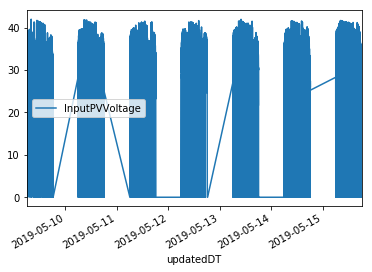

In [217]:
df4.plot(x='updatedDT', y='InputPVVoltage')

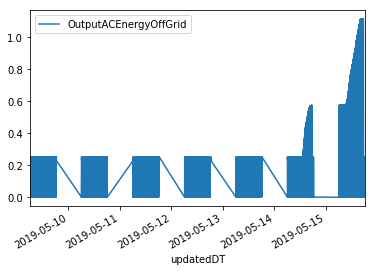

In [218]:
df4.plot(x='updatedDT', y='OutputACEnergyOffGrid')

In [220]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63483 entries, 0 to 63544
Data columns (total 21 columns):
Unnamed: 0               63483 non-null int64
timestamp                63483 non-null datetime64[ns]
dataId                   63483 non-null float64
updatedDT                63483 non-null datetime64[ns, Asia/Calcutta]
SystemID                 63483 non-null float64
UID                      63483 non-null object
DeviceCount              63483 non-null float64
InputPVVoltage           63483 non-null float64
InputPVCurrent           55637 non-null float64
InputPVPower             63483 non-null float64
InputPVEnergyTotal       63483 non-null float64
OutputACVoltage          63483 non-null float64
OutputACCurrent          55637 non-null float64
OutputACPower            63483 non-null float64
OutputACEnergyTotal      63483 non-null float64
OutputACEnergyOnGrid     63483 non-null float64
OutputACEnergyOffGrid    63483 non-null float64
Temperature              63483 non-null float64
S

In [37]:
df5=df4

In [35]:
df5.isnull().sum()

Unnamed: 0                  0
timestamp                   0
dataId                      0
updatedDT                   0
SystemID                    0
UID                         0
DeviceCount                 0
InputPVVoltage              0
InputPVCurrent           7846
InputPVPower                0
InputPVEnergyTotal          0
OutputACVoltage             0
OutputACCurrent          7846
OutputACPower               0
OutputACEnergyTotal         0
OutputACEnergyOnGrid        0
OutputACEnergyOffGrid       0
Temperature                 0
SystemStatus                0
TripError                   0
MasterSlave                 0
dtype: int64

#df5 is a copy of df4 for backup

In [36]:
df4=df4.set_index('updatedDT')

In [227]:
df4

,Unnamed: 0,timestamp,dataId,SystemID,UID,DeviceCount,InputPVVoltage,InputPVCurrent,InputPVPower,InputPVEnergyTotal,OutputACVoltage,OutputACCurrent,OutputACPower,OutputACEnergyTotal,OutputACEnergyOnGrid,OutputACEnergyOffGrid,Temperature,SystemStatus,TripError,MasterSlave
updatedDT,,,,,,,,,,,,,,,,,,,,
2019-05-09 06:09:07+05:30,0,1970-01-01 00:00:01.557362347,41611464.0,103.0,kripya.d180121,2.0,35.693696,NaN,0.000000,93.362885,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.760,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 06:09:41+05:30,1,1970-01-01 00:00:01.557362381,41611496.0,103.0,kripya.d180121,2.0,35.886784,NaN,0.000000,93.362885,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 06:10:17+05:30,2,1970-01-01 00:00:01.557362417,41611523.0,103.0,kripya.d180121,2.0,35.886784,NaN,0.000000,93.362885,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 06:10:52+05:30,3,1970-01-01 00:00:01.557362452,41611552.0,103.0,kripya.d180121,2.0,36.300544,NaN,0.000000,93.362885,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 06:11:26+05:30,4,1970-01-01 00:00:01.557362486,41611581.0,103.0,kripya.d180121,2.0,36.493632,NaN,0.000000,93.362885,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 06:12:01+05:30,5,1970-01-01 00:00:01.557362521,41611613.0,103.0,kripya.d180121,2.0,34.052448,0.000000,0.000000,93.362885,238.2189,0.0869,20.701222,124.061628,123.810151,0.251477,46.800,GRID_MODE,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 06:12:36+05:30,6,1970-01-01 00:00:01.557362556,41611641.0,103.0,kripya.d180121,2.0,35.610944,0.000000,0.000000,93.362885,238.0269,0.0281,6.688556,124.061693,123.810216,0.251477,46.944,GRID_MODE,FLYBACK_OUTPUT_VOLTAGE,MASTER
2019-05-09 06:13:11+05:30,7,1970-01-01 00:00:01.557362591,41611672.0,103.0,kripya.d180121,2.0,35.831616,0.000000,0.000000,93.362885,236.9229,0.0501,11.869837,124.061808,123.810331,0.251477,48.192,GRID_MODE,NO_FAULT,MASTER
2019-05-09 06:13:46+05:30,8,1970-01-01 00:00:01.557362626,41611702.0,103.0,kripya.d180121,2.0,35.114432,0.000000,0.000000,93.362885,235.1469,0.0697,16.389739,124.061968,123.810490,0.251477,47.712,GRID_MODE,NO_FAULT,MASTER


Text(0, 0.5, 'ACEnergyOffGrid')

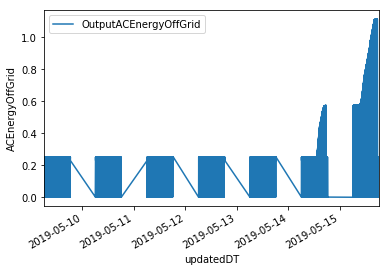

In [257]:
df4.plot(y='OutputACEnergyOffGrid')
plt.ylabel('ACEnergyOffGrid')

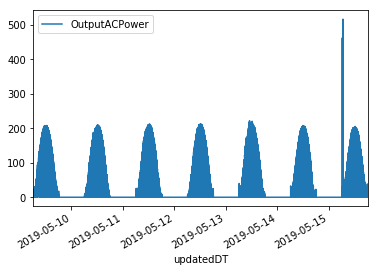

In [264]:
df4.plot(y='OutputACPower')

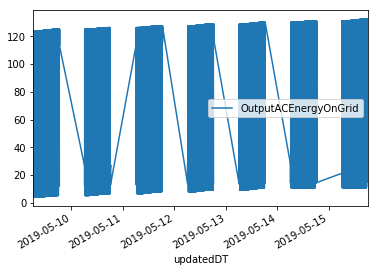

In [265]:
df4.plot(y='OutputACEnergyOnGrid')

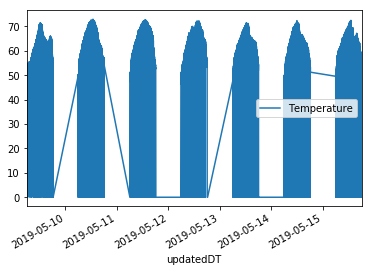

In [267]:
df4.plot(y='Temperature')

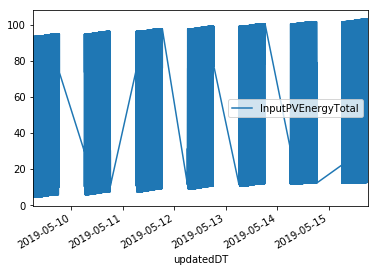

In [268]:
df4.plot(y='InputPVEnergyTotal')

In [271]:
rolmean=df4.rolling(window=365).std()

NotImplementedError: ops for Rolling for this dtype datetime64[ns] are not implemented

In [38]:
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot

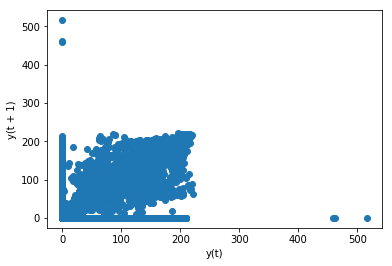

In [276]:
lag_plot(df4.OutputACPower)

In [4]:
lag_plot(df4.OutputACEnergyTotal)

NameError: name 'lag_plot' is not defined

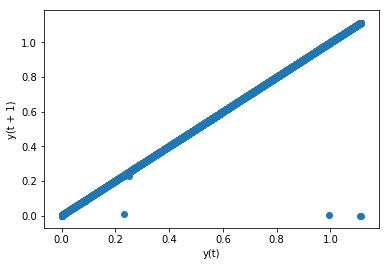

In [279]:
lag_plot(df4.OutputACEnergyOffGrid )

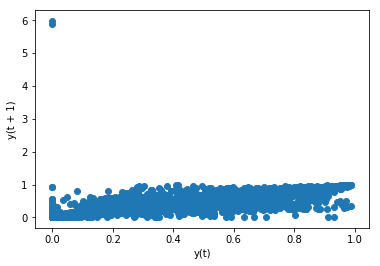

In [41]:
lag_plot(df4.OutputACCurrent)  

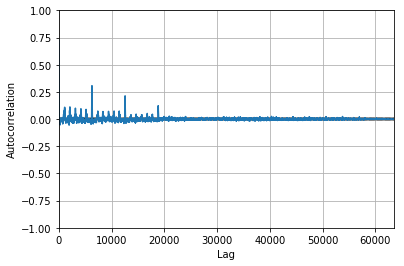

In [284]:
autocorrelation_plot(df4.OutputACVoltage)
plt.show()

In [285]:
model=sm.tsa.statespace.SARIMAX(df4['OutputACEnergyOffGrid'], order=(1,0,0),seasonal_order=(1,1,1,12))
results=model.fit()

/home/harla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/harla/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


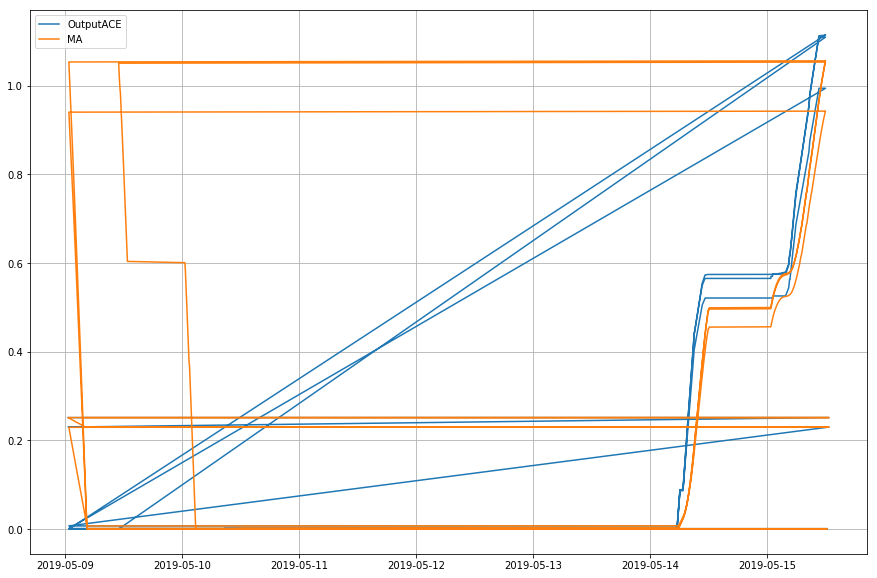

In [300]:
df4['new1']=df4.OutputACEnergyOffGrid.rolling(window=365).mean()
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(df4['OutputACEnergyOffGrid'],label='OutputACE')
plt.plot(df4['new1'],label='MA')
plt.legend(loc=2)

In [339]:
df4.head(25)

,Unnamed: 0,timestamp,dataId,SystemID,UID,DeviceCount,InputPVVoltage,InputPVCurrent,InputPVPower,InputPVEnergyTotal,...,OutputACCurrent,OutputACPower,OutputACEnergyTotal,OutputACEnergyOnGrid,OutputACEnergyOffGrid,Temperature,SystemStatus,TripError,MasterSlave,new1
updatedDT,,,,,,,,,,,,,,,,,,,,,
2019-05-09 06:09:07+05:30,0,1970-01-01 00:00:01.557362347,41611464.0,103.0,kripya.d180121,2.0,35.693696,NaN,0.000000,93.362885,...,NaN,0.000000,124.061427,123.809949,0.251477,47.760,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER,NaN
2019-05-09 06:09:41+05:30,1,1970-01-01 00:00:01.557362381,41611496.0,103.0,kripya.d180121,2.0,35.886784,NaN,0.000000,93.362885,...,NaN,0.000000,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER,NaN
2019-05-09 06:10:17+05:30,2,1970-01-01 00:00:01.557362417,41611523.0,103.0,kripya.d180121,2.0,35.886784,NaN,0.000000,93.362885,...,NaN,0.000000,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER,NaN
2019-05-09 06:10:52+05:30,3,1970-01-01 00:00:01.557362452,41611552.0,103.0,kripya.d180121,2.0,36.300544,NaN,0.000000,93.362885,...,NaN,0.000000,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER,NaN
2019-05-09 06:11:26+05:30,4,1970-01-01 00:00:01.557362486,41611581.0,103.0,kripya.d180121,2.0,36.493632,NaN,0.000000,93.362885,...,NaN,0.000000,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER,NaN
2019-05-09 06:12:01+05:30,5,1970-01-01 00:00:01.557362521,41611613.0,103.0,kripya.d180121,2.0,34.052448,0.000000,0.000000,93.362885,...,0.0869,20.701222,124.061628,123.810151,0.251477,46.800,GRID_MODE,FLYBACK_OUTPUT_VOLTAGE,MASTER,NaN
2019-05-09 06:12:36+05:30,6,1970-01-01 00:00:01.557362556,41611641.0,103.0,kripya.d180121,2.0,35.610944,0.000000,0.000000,93.362885,...,0.0281,6.688556,124.061693,123.810216,0.251477,46.944,GRID_MODE,FLYBACK_OUTPUT_VOLTAGE,MASTER,NaN
2019-05-09 06:13:11+05:30,7,1970-01-01 00:00:01.557362591,41611672.0,103.0,kripya.d180121,2.0,35.831616,0.000000,0.000000,93.362885,...,0.0501,11.869837,124.061808,123.810331,0.251477,48.192,GRID_MODE,NO_FAULT,MASTER,NaN
2019-05-09 06:13:46+05:30,8,1970-01-01 00:00:01.557362626,41611702.0,103.0,kripya.d180121,2.0,35.114432,0.000000,0.000000,93.362885,...,0.0697,16.389739,124.061968,123.810490,0.251477,47.712,GRID_MODE,NO_FAULT,MASTER,NaN


In [340]:
data=[ ['2019-05-09 06:09:07+05:30','0','0.000000'],
    ['2019-05-09 06:12:01+05:30','5','20.701222'],
      ['2019-05-09 06:12:36+05:30','6','6.688556'],
      ['2019-05-09 06:13:11+05:30','7','11.869837'],
      ['2019-05-09 06:13:46+05:30','8','16.389739'],
      ['2019-05-09 06:14:21+05:30','9','1.532511'],
      ['2019-05-09 06:14:57+05:30','10','5.908942'],
      ['2019-05-09 06:15:32+05:30','11','5.019875'],
      ['2019-05-09 06:16:07+05:30','12','1.917131'],
      ['2019-05-09 06:16:41+05:30','13','5.636687'],
      ['2019-05-09 06:17:17+05:30','14','11.446785'],
      ['2019-05-09 06:17:52+05:30','15','11.172466'],
      ['2019-05-09 06:18:27+05:30','16','6.793343'],
      ['2019-05-09 06:19:02+05:30','17','8.631918'],
      ['2019-05-09 06:19:37+05:30','18','7.294220'],
      ['2019-05-09 06:20:12+05:30','19','12.181911'],
      ['2019-05-09 06:20:48+05:30','20','7.739283'],
      ['2019-05-09 06:21:23+05:30','21','4.686896'],
      ['2019-05-09 06:21:58+05:30','22','5.888497'],
      ['2019-05-09 06:22:33+05:30','23','5.549092'],
      ['2019-05-09 06:23:08+05:30','24','6.607628']
    ]
df_graph = pd.DataFrame(data, columns = ['updatedDT', 'Unnamed',  
                                    'OutputACPower'
                                        ] ) 


In [341]:
df_graph=df_graph.set_index('updatedDT')

In [326]:
df_graph.plot(y='OutputACPower')

TypeError: Empty 'DataFrame': no numeric data to plot

In [343]:
df_graph.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 2019-05-09 06:09:07+05:30 to 2019-05-09 06:23:08+05:30
Data columns (total 2 columns):
Unnamed          21 non-null object
OutputACPower    21 non-null object
dtypes: object(2)
memory usage: 504.0+ bytes


In [344]:
df_graph=df_graph.set_index('Unnamed')

In [345]:
df_graph

,OutputACPower
Unnamed,
0,0.000000
5,20.701222
6,6.688556
7,11.869837
8,16.389739
9,1.532511
10,5.908942
11,5.019875
12,1.917131


In [320]:
df_graph.plot(y='OutputACPower')

TypeError: Empty 'DataFrame': no numeric data to plot

In [346]:
df_graph.OutputACPower=pd.to_numeric(df_graph.OutputACPower)

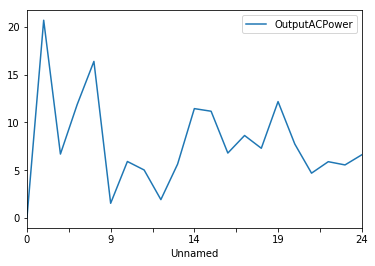

In [347]:
df_graph.plot()

In [ ]:
df_graph=df_graph

In [1]:
df4.plot(y='OutputACCurrent')

NameError: name 'df4' is not defined

In [2]:
df4

NameError: name 'df4' is not defined

In [3]:
df5

NameError: name 'df5' is not defined